In [12]:
from matplotlib import pyplot as plt
import numpy as np

[-0.010331]
post relaxation propagation energy difference: [-0.00924  -0.008208 -0.007341 -0.006682 -0.005923 -0.006245 -0.005022
 -0.005746 -0.005445 -0.005648]
energy difference error: [2.60e-05 5.20e-05 8.90e-05 1.28e-04 1.95e-04 1.46e-04 8.69e-04 2.33e-04
 2.98e-04 3.05e-04]
uncorrelated afqmc energy error: 0.0019502384765517759


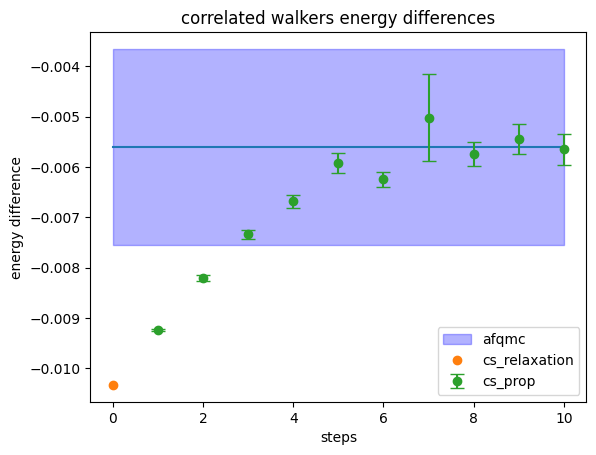

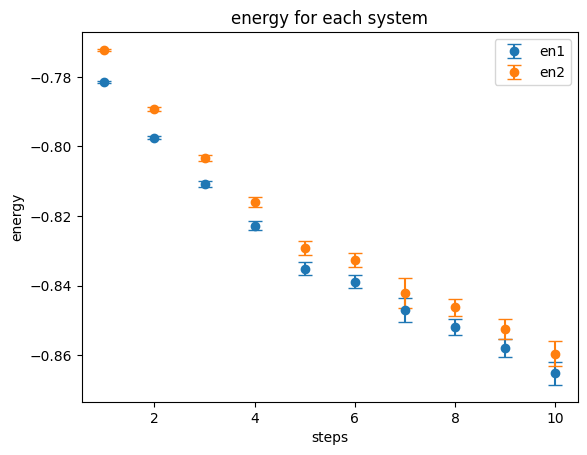

In [15]:
rlx_data = '''
# relaxation from mean-field object using 100 walkers
# rlx_step       system1_en      system2_en      en_diff
    0            -0.762049       -0.751719       -0.010331
# relaxation time: 3.55
'''

prop_data = '''
# step   system1_en      error           system2_en      error           energy_diff     error
  1      -0.781482       0.000238        -0.772242       0.000261        -0.009240       0.000026
  2      -0.797480       0.000498        -0.789272       0.000542        -0.008208       0.000052
  3      -0.810743       0.000802        -0.803402       0.000877        -0.007341       0.000089
  4      -0.822741       0.001284        -0.816058       0.001395        -0.006682       0.000128
  5      -0.835218       0.001874        -0.829295       0.002024        -0.005923       0.000195
  6      -0.838928       0.001847        -0.832683       0.001949        -0.006245       0.000146
  7      -0.847119       0.003453        -0.842097       0.004258        -0.005022       0.000869
  8      -0.852021       0.002282        -0.846276       0.002406        -0.005746       0.000233
  9      -0.857919       0.002691        -0.852474       0.002942        -0.005445       0.000298
  10     -0.865201       0.003344        -0.859552       0.003573        -0.005648       0.000305
# total run time: 24.86
'''

rlx_en_diff = []
lines = rlx_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 3:
            rlx_en_diff.append(columns[3])

rlx_en_diff = np.array(rlx_en_diff,dtype='float32')
print(f'{rlx_en_diff}')

prop_en_diff = []
prop_en_diff_err = []
lines = prop_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 5:
            prop_en_diff.append(columns[5])
        if len(columns) > 6:
            prop_en_diff_err.append(columns[6])

prop_en_diff = np.array(prop_en_diff,dtype='float32')
print(f'post relaxation propagation energy difference: {prop_en_diff}')
prop_en_diff_err = np.array(prop_en_diff_err,dtype='float32')
print(f'energy difference error: {prop_en_diff_err}')

rlx_steps = np.arange(len(rlx_en_diff))
prop_steps = np.arange(len(rlx_en_diff),len(rlx_en_diff)+len(prop_en_diff))

afqmc_en_diff = -0.005606581337333716
afqmc_en_diff_err = 0.0019502384765517759
print(f'uncorrelated afqmc energy error: {afqmc_en_diff_err}')
x_steps = np.linspace(0,max(prop_steps),100)
afqmc_en = np.array([afqmc_en_diff]*len(x_steps))
afqmc_lw = afqmc_en-afqmc_en_diff_err
afqmc_up = afqmc_en+afqmc_en_diff_err
plt.plot(x_steps,afqmc_en)
plt.fill_between(x_steps, afqmc_lw, afqmc_up, color='blue', alpha=0.3, label='afqmc')
plt.plot(rlx_steps,rlx_en_diff,'o',label='cs_relaxation')
plt.errorbar(prop_steps,prop_en_diff,yerr=prop_en_diff_err, fmt='o', capsize=5,label='cs_prop')
plt.xlabel('steps')
plt.ylabel('energy difference')
plt.title('correlated walkers energy differences')
plt.legend()
plt.show()

en1 = []
err1 = []
en2 = []
err2 = []

lines = prop_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 1:
            en1.append(columns[1])
        if len(columns) > 2:
            err1.append(columns[2])
        if len(columns) > 3:
            en2.append(columns[3])
        if len(columns) > 4:
            err2.append(columns[4])

en1 = np.array(en1,dtype='float32')
err1 = np.array(err1,dtype='float32')
en2 = np.array(en2,dtype='float32')
err2 = np.array(err2,dtype='float32')

rlx_en1 = []
rlx_en2 = []
lines = rlx_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 1:
            rlx_en1.append(columns[1])
        if len(columns) > 2:
            rlx_en2.append(columns[2])
            

rlx_en_diff = np.array(rlx_en_diff,dtype='float32')

# plt.plot(rlx_steps,rlx_en1,'o',label='cs_relaxation')
# plt.plot(rlx_steps,rlx_en2,'o',label='cs_relaxation')
plt.errorbar(prop_steps,en1,yerr=err1, fmt='o', capsize=5,label='en1')
plt.errorbar(prop_steps,en2,yerr=err2, fmt='o', capsize=5,label='en2')
plt.xlabel('steps')
plt.ylabel('energy')
plt.title('energy for each system')
plt.legend()
plt.show()

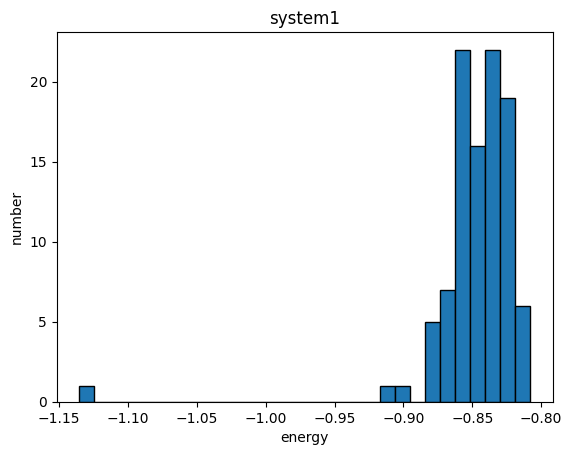

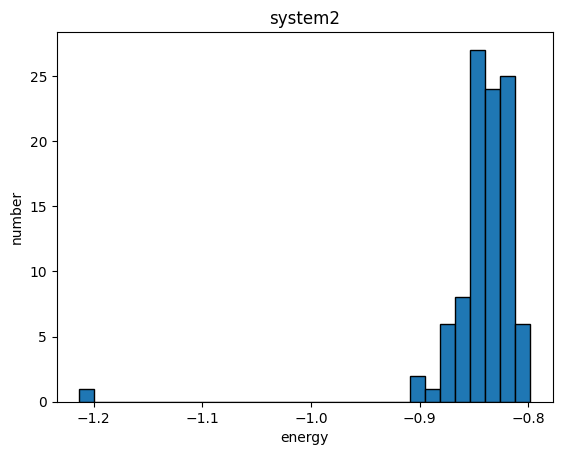

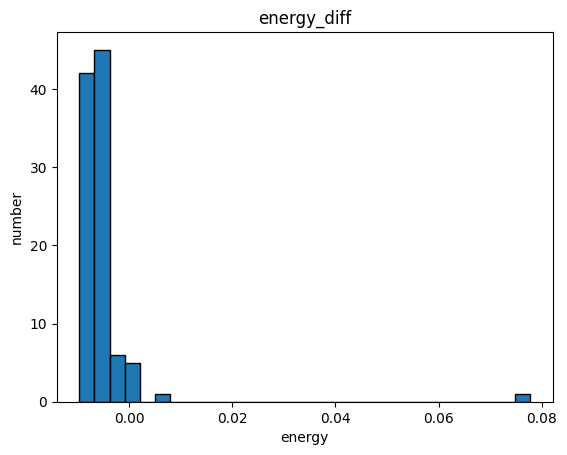

In [19]:
last_step = '''
# debug the big uncertainty step
# run    sys1_en         sys2_en         en_diff
  1      -0.828183       -0.820711       -0.007472
  2      -0.826960       -0.820886       -0.006074
  3      -0.828379       -0.820082       -0.008297
  4      -0.832864       -0.825480       -0.007384
  5      -0.855673       -0.848983       -0.006690
  6      -0.850702       -0.846643       -0.004059
  7      -0.826929       -0.819956       -0.006974
  8      -0.864414       -0.856465       -0.007949
  9      -0.851148       -0.846184       -0.004964
  10     -0.861604       -0.856583       -0.005022
  11     -0.840449       -0.834441       -0.006009
  12     -0.846762       -0.842099       -0.004664
  13     -0.835895       -0.828937       -0.006958
  14     -0.865382       -0.861129       -0.004253
  15     -0.853617       -0.847565       -0.006051
  16     -0.858692       -0.852353       -0.006339
  17     -0.821340       -0.815327       -0.006013
  18     -0.869027       -0.876376       0.007349
  19     -0.837250       -0.833309       -0.003941
  20     -0.880214       -0.881903       0.001689
  21     -0.866412       -0.861011       -0.005401
  22     -0.857359       -0.851818       -0.005540
  23     -0.857523       -0.850014       -0.007509
  24     -0.836631       -0.830282       -0.006350
  25     -0.844961       -0.839428       -0.005533
  26     -0.835559       -0.827558       -0.008001
  27     -0.857581       -0.852189       -0.005392
  28     -0.840965       -0.834227       -0.006738
  29     -0.825730       -0.819576       -0.006154
  30     -0.850791       -0.847087       -0.003704
  31     -0.854682       -0.846429       -0.008253
  32     -0.816681       -0.808739       -0.007942
  33     -0.822696       -0.814688       -0.008008
  34     -0.828231       -0.822018       -0.006213
  35     -0.855774       -0.850149       -0.005625
  36     -0.835712       -0.828546       -0.007166
  37     -0.879972       -0.879915       -0.000056
  38     -0.822488       -0.814848       -0.007640
  39     -0.833533       -0.825953       -0.007580
  40     -0.855175       -0.848393       -0.006782
  41     -0.811588       -0.803977       -0.007611
  42     -0.822851       -0.814551       -0.008300
  43     -0.821019       -0.813149       -0.007870
  44     -0.856891       -0.852353       -0.004538
  45     -0.907071       -0.907625       0.000554
  46     -0.816387       -0.807928       -0.008459
  47     -0.831114       -0.824073       -0.007041
  48     -0.858838       -0.852084       -0.006754
  49     -0.832119       -0.824691       -0.007427
  50     -0.836464       -0.830017       -0.006447
  51     -0.825171       -0.816894       -0.008277
  52     -1.135239       -1.213034       0.077795
  53     -0.841509       -0.835524       -0.005985
  54     -0.846096       -0.839720       -0.006377
  55     -0.850932       -0.845490       -0.005442
  56     -0.833649       -0.827176       -0.006473
  57     -0.824679       -0.818608       -0.006072
  58     -0.824382       -0.817017       -0.007365
  59     -0.837577       -0.830935       -0.006642
  60     -0.879005       -0.877812       -0.001193
  61     -0.817936       -0.809530       -0.008406
  62     -0.855568       -0.849889       -0.005679
  63     -0.831424       -0.824260       -0.007164
  64     -0.826513       -0.819297       -0.007216
  65     -0.848228       -0.849720       0.001492
  66     -0.856938       -0.852719       -0.004220
  67     -0.874521       -0.867957       -0.006565
  68     -0.844201       -0.838314       -0.005887
  69     -0.813954       -0.806793       -0.007161
  70     -0.861616       -0.859614       -0.002002
  71     -0.835843       -0.829254       -0.006590
  72     -0.836703       -0.829392       -0.007311
  73     -0.882539       -0.878344       -0.004195
  74     -0.900715       -0.899881       -0.000834
  75     -0.833728       -0.826874       -0.006854
  76     -0.827455       -0.820569       -0.006886
  77     -0.854585       -0.849643       -0.004942
  78     -0.864424       -0.861976       -0.002448
  79     -0.833715       -0.826836       -0.006879
  80     -0.831220       -0.824932       -0.006288
  81     -0.825174       -0.817507       -0.007667
  82     -0.850832       -0.844121       -0.006711
  83     -0.826309       -0.818949       -0.007360
  84     -0.842017       -0.836042       -0.005975
  85     -0.851847       -0.844839       -0.007007
  86     -0.842326       -0.836839       -0.005486
  87     -0.854699       -0.849228       -0.005472
  88     -0.853131       -0.847595       -0.005536
  89     -0.865300       -0.858729       -0.006571
  90     -0.857953       -0.852433       -0.005520
  91     -0.840930       -0.834262       -0.006668
  92     -0.836408       -0.830002       -0.006406
  93     -0.852568       -0.844217       -0.008351
  94     -0.873235       -0.870064       -0.003171
  95     -0.841802       -0.834885       -0.006917
  96     -0.839685       -0.832674       -0.007011
  97     -0.807804       -0.798170       -0.009634
  98     -0.859548       -0.856613       -0.002935
  99     -0.829940       -0.820713       -0.009227
  100    -0.822003       -0.815056       -0.006947
# system1 energy: -0.847119
# system2 energy: -0.842097
# energy difference: -0.005022
'''

samp_en1 = []
samp_en2 = []
samp_diff = []

lines = last_step.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 1:
            samp_en1.append(columns[1])
        if len(columns) > 2:
            samp_en2.append(columns[2])
        if len(columns) > 3:
            samp_diff.append(columns[3])

samp_en1 = np.array(samp_en1,dtype='float32')
samp_en2 = np.array(samp_en2,dtype='float32')
samp_diff = np.array(samp_diff,dtype='float32')

plt.hist(samp_en1 , bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number')
plt.title('system1')
plt.show()
plt.hist(samp_en2, bins=30,edgecolor='black')
plt.xlabel('energy')
plt.ylabel('number')
plt.title('system2')
plt.show()
plt.hist(samp_diff, bins=30,edgecolor='black')
plt.xlabel('energy')
plt.ylabel('number')
plt.title('energy_diff')
plt.show()

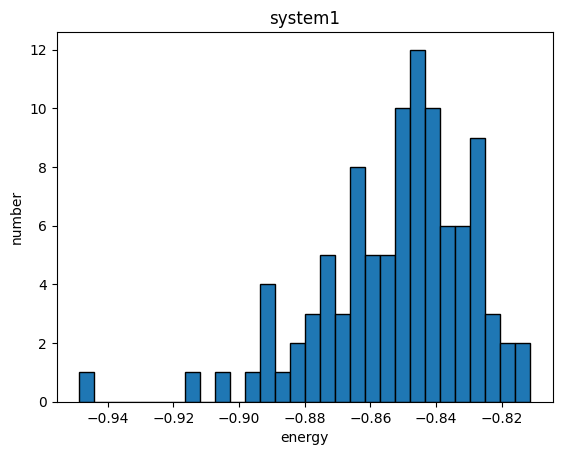

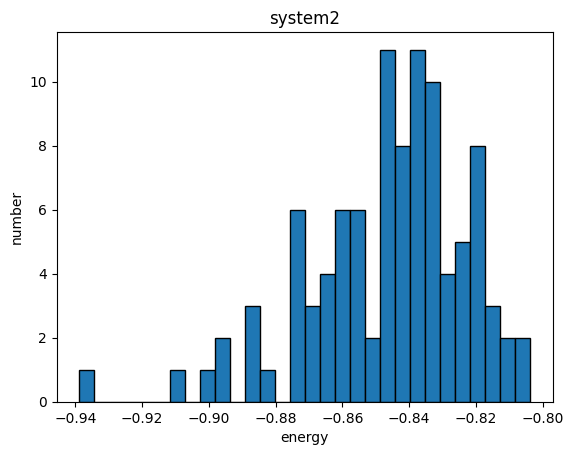

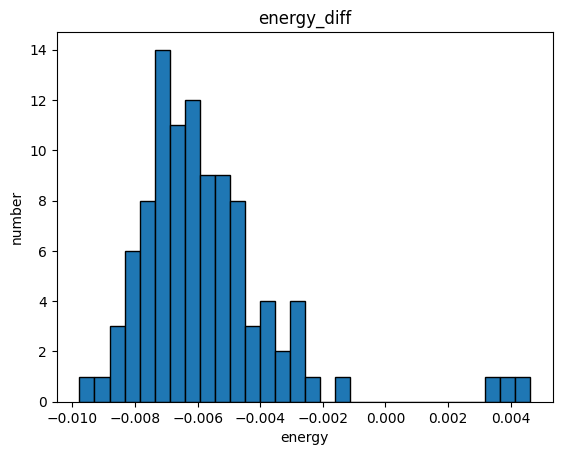

In [20]:
last_step = '''
# debug the big uncertainty step
# run    sys1_en         sys2_en         en_diff
  1      -0.845587       -0.841343       -0.004244
  2      -0.835977       -0.830579       -0.005398
  3      -0.848231       -0.843610       -0.004620
  4      -0.871007       -0.864926       -0.006081
  5      -0.904931       -0.900944       -0.003988
  6      -0.853482       -0.848099       -0.005383
  7      -0.817423       -0.809742       -0.007681
  8      -0.848677       -0.841909       -0.006768
  9      -0.847940       -0.843232       -0.004708
  10     -0.833052       -0.824962       -0.008090
  11     -0.853027       -0.848351       -0.004676
  12     -0.851065       -0.845689       -0.005376
  13     -0.828850       -0.822211       -0.006639
  14     -0.880113       -0.875408       -0.004705
  15     -0.864449       -0.858833       -0.005615
  16     -0.839249       -0.833376       -0.005873
  17     -0.823920       -0.816644       -0.007276
  18     -0.851784       -0.845173       -0.006611
  19     -0.845919       -0.839148       -0.006771
  20     -0.863725       -0.862534       -0.001191
  21     -0.866524       -0.861032       -0.005492
  22     -0.842253       -0.834485       -0.007768
  23     -0.865562       -0.858264       -0.007298
  24     -0.811328       -0.804194       -0.007133
  25     -0.836098       -0.829083       -0.007015
  26     -0.847475       -0.840442       -0.007032
  27     -0.890376       -0.888079       -0.002297
  28     -0.841840       -0.835331       -0.006508
  29     -0.842345       -0.836765       -0.005580
  30     -0.840444       -0.833279       -0.007164
  31     -0.840395       -0.832605       -0.007790
  32     -0.825092       -0.817555       -0.007537
  33     -0.846787       -0.838612       -0.008175
  34     -0.821901       -0.814866       -0.007036
  35     -0.855149       -0.848886       -0.006263
  36     -0.831437       -0.823063       -0.008374
  37     -0.873024       -0.870099       -0.002925
  38     -0.827638       -0.821138       -0.006500
  39     -0.842824       -0.835713       -0.007111
  40     -0.853840       -0.848363       -0.005477
  41     -0.948578       -0.938801       -0.009777
  42     -0.831062       -0.823988       -0.007074
  43     -0.837784       -0.831059       -0.006725
  44     -0.852909       -0.847133       -0.005776
  45     -0.860598       -0.855645       -0.004953
  46     -0.825333       -0.817453       -0.007880
  47     -0.847771       -0.841649       -0.006122
  48     -0.885798       -0.882552       -0.003245
  49     -0.825145       -0.817251       -0.007895
  50     -0.837224       -0.830846       -0.006379
  51     -0.881685       -0.875549       -0.006136
  52     -0.877062       -0.872486       -0.004575
  53     -0.867852       -0.863294       -0.004558
  54     -0.846113       -0.838775       -0.007338
  55     -0.859274       -0.856675       -0.002599
  56     -0.826767       -0.819578       -0.007188
  57     -0.841600       -0.837615       -0.003985
  58     -0.851638       -0.848419       -0.003219
  59     -0.865202       -0.860027       -0.005175
  60     -0.874857       -0.868701       -0.006156
  61     -0.812685       -0.803694       -0.008991
  62     -0.865544       -0.859177       -0.006367
  63     -0.869018       -0.872770       0.003752
  64     -0.830251       -0.821468       -0.008783
  65     -0.893066       -0.897698       0.004632
  66     -0.842601       -0.836079       -0.006522
  67     -0.871098       -0.864764       -0.006334
  68     -0.877221       -0.874201       -0.003020
  69     -0.840905       -0.833908       -0.006997
  70     -0.863311       -0.859360       -0.003951
  71     -0.838062       -0.832689       -0.005373
  72     -0.844178       -0.836559       -0.007618
  73     -0.876398       -0.873424       -0.002973
  74     -0.891343       -0.887767       -0.003577
  75     -0.822116       -0.814406       -0.007710
  76     -0.838299       -0.831527       -0.006771
  77     -0.843915       -0.837649       -0.006266
  78     -0.893965       -0.897548       0.003583
  79     -0.826390       -0.818823       -0.007568
  80     -0.851227       -0.846975       -0.004252
  81     -0.852369       -0.845898       -0.006471
  82     -0.861675       -0.855915       -0.005760
  83     -0.825107       -0.817547       -0.007560
  84     -0.858702       -0.853480       -0.005222
  85     -0.843473       -0.834978       -0.008495
  86     -0.828335       -0.822342       -0.005994
  87     -0.912513       -0.907686       -0.004827
  88     -0.851767       -0.846004       -0.005762
  89     -0.846646       -0.838315       -0.008331
  90     -0.872768       -0.866778       -0.005990
  91     -0.862790       -0.855765       -0.007025
  92     -0.858232       -0.852905       -0.005327
  93     -0.818991       -0.811088       -0.007903
  94     -0.847420       -0.840627       -0.006793
  95     -0.834155       -0.827257       -0.006897
  96     -0.891280       -0.886974       -0.004306
  97     -0.833022       -0.827373       -0.005649
  98     -0.859605       -0.854610       -0.004995
  99     -0.850747       -0.844664       -0.006083
  100    -0.845954       -0.840813       -0.005141
# system1 energy: -0.852021
# system2 energy: -0.846276
# energy difference: -0.005746
'''

samp_en1 = []
samp_en2 = []
samp_diff = []

lines = last_step.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 1:
            samp_en1.append(columns[1])
        if len(columns) > 2:
            samp_en2.append(columns[2])
        if len(columns) > 3:
            samp_diff.append(columns[3])

samp_en1 = np.array(samp_en1,dtype='float32')
samp_en2 = np.array(samp_en2,dtype='float32')
samp_diff = np.array(samp_diff,dtype='float32')

plt.hist(samp_en1 , bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number')
plt.title('system1')
plt.show()
plt.hist(samp_en2, bins=30,edgecolor='black')
plt.xlabel('energy')
plt.ylabel('number')
plt.title('system2')
plt.show()
plt.hist(samp_diff, bins=30,edgecolor='black')
plt.xlabel('energy')
plt.ylabel('number')
plt.title('energy_diff')
plt.show()

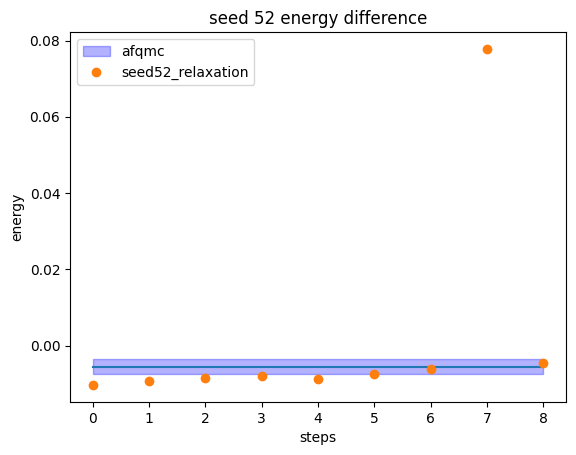

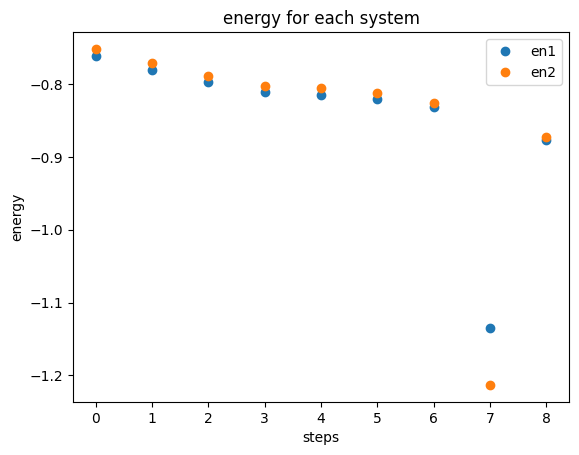

In [11]:
### investigate run 52 ###
### seeds[51] = 514825 

rlx_data = '''
# relaxation from mean-field object using 100 walkers
# rlx_step       system1_en      system2_en      en_diff
    0            -0.762049       -0.751719       -0.010331
    1            -0.780147       -0.770754       -0.009392
    2            -0.797634       -0.789149       -0.008484
    3            -0.811106       -0.803070       -0.008036
    4            -0.814336       -0.805636       -0.008700
    5            -0.820182       -0.812610       -0.007571
    6            -0.831913       -0.825825       -0.006088
    7            -1.135239       -1.213034       0.077795
    8            -0.877062       -0.872486       -0.004575
# relaxation time: 26.37
'''

step = []
en_diff = []
en1 = []
en2 = []
lines = rlx_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 0:
            step.append(columns[0])
        if len(columns) > 1:
            en1.append(columns[1])
        if len(columns) > 2:
            en2.append(columns[2])
        if len(columns) > 3:
            en_diff.append(columns[3])

step = np.array(step,dtype='float32')
en1 = np.array(en1,dtype='float32')
en2 = np.array(en2,dtype='float32')
en_diff = np.array(en_diff,dtype='float32')


afqmc_en_diff = -0.005606581337333716
afqmc_en_diff_err = 0.0019502384765517759
x_steps = np.linspace(0,max(step),100)
afqmc_en = np.array([afqmc_en_diff]*len(x_steps))
afqmc_lw = afqmc_en-afqmc_en_diff_err
afqmc_up = afqmc_en+afqmc_en_diff_err
plt.plot(x_steps,afqmc_en)
plt.fill_between(x_steps, afqmc_lw, afqmc_up, color='blue', alpha=0.3, label='afqmc')
plt.plot(step,en_diff,'o',label='seed52_relaxation')
#plt.errorbar(prop_steps,prop_en_diff,yerr=prop_en_diff_err, fmt='o', capsize=5,label='ucs_prop')
plt.xlabel('steps')
plt.ylabel('energy')
plt.title('seed 52 energy difference')
plt.legend()
plt.show()


plt.plot(step,en1,'o',label='en1')
plt.plot(step,en2,'o',label='en2')
plt.xlabel('steps')
plt.ylabel('energy')
plt.title('energy for each system')
plt.legend()
plt.show()

the energy of system 1 is -0.8319128638867735
the energy of system 2 is -0.825825259708904
the energy difference is -0.006087604177869577


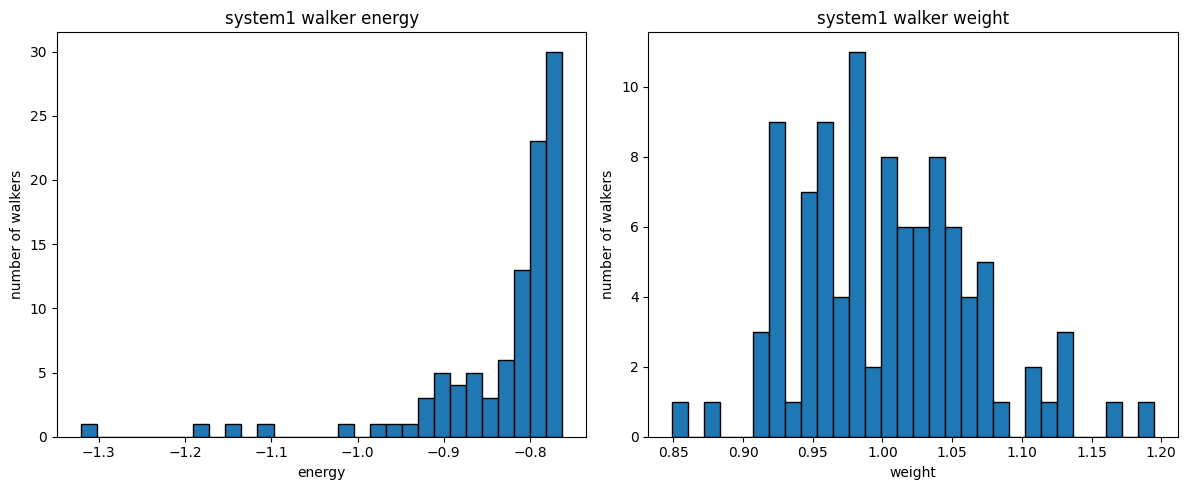

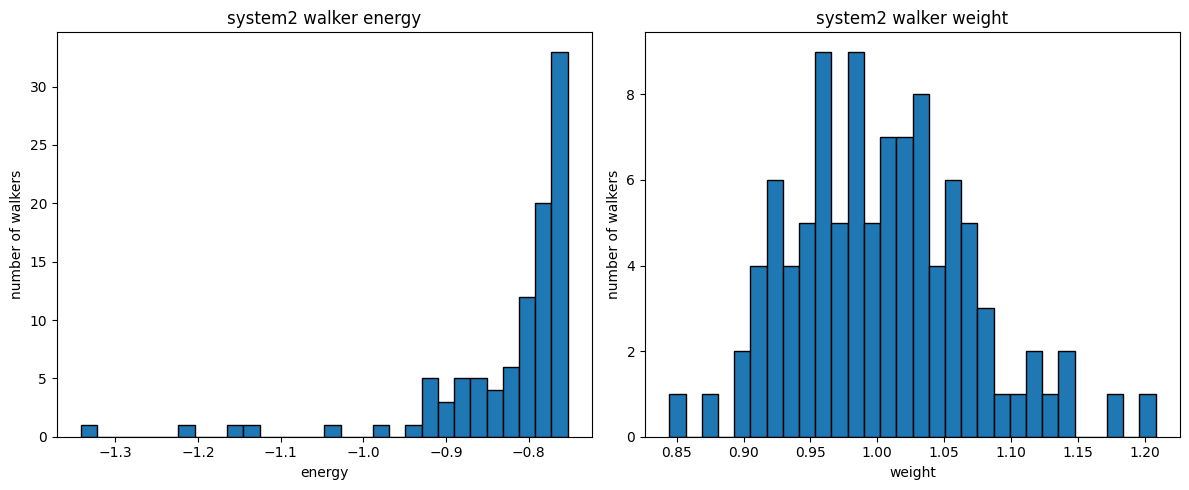

In [10]:
### investigate walkers at step 6 ###

walker_data = '''
# walkers analyze of the last step
# the energy system1 is -0.831913
# the energy system2 is -0.825825
# walker 	 system1_en 	 system1_wt 	 	 overlap1 	 imp1 	 system2_en 	 system2_wt 	 	 overlap2 	 imp2
  1 	 	  -0.866668 	 1.131468 	  0.302533+-0.494227j 	 0.999662  -0.862055 	 1.134969 	   0.289407+-0.498610j 	 0.999447
  2 	 	  -0.765960 	 0.981760 	  -0.786179+0.430396j 	 0.998729  -0.755589 	 0.977085 	   -0.760267+0.481385j 	 0.998730
  3 	 	  -0.767647 	 1.049644 	  -0.039364+-0.839523j 	 1.000530  -0.758821 	 1.055603 	   0.018264+-0.836239j 	 1.000552
  4 	 	  -0.828674 	 0.921985 	  -0.088717+0.637737j 	 1.001126  -0.832941 	 0.923952 	   -0.027339+0.616919j 	 1.001245
  5 	 	  -0.782060 	 0.958191 	  0.796086+0.088368j 	 0.999749  -0.772457 	 0.956598 	   0.794835+0.089748j 	 0.999681
  6 	 	  -0.861911 	 0.985328 	  0.123501+-0.594355j 	 1.001609  -0.860393 	 0.982609 	   0.101847+-0.587847j 	 1.001658
  7 	 	  -0.778785 	 0.918960 	  -0.025449+0.419499j 	 1.001529  -0.769430 	 0.921169 	   0.033654+0.431096j 	 1.001508
  8 	 	  -1.010361 	 1.046106 	  -0.099330+0.432021j 	 1.002887  -1.035981 	 1.049843 	   -0.125941+0.403866j 	 1.003250
  9 	 	  -0.770705 	 1.006618 	  0.818651+0.185116j 	 1.002460  -0.761002 	 1.004834 	   0.812501+0.204138j 	 1.002463
  10 	 	  -0.795747 	 1.056356 	  -0.687436+-0.412677j 	 1.000807  -0.780639 	 1.053074 	   -0.674074+-0.461798j 	 1.000759
  11 	 	  -1.174601 	 1.027331 	  0.242435+0.203162j 	 0.992761  -1.205479 	 1.029398 	   0.240794+0.183249j 	 0.992762
  12 	 	  -0.889211 	 0.941792 	  0.106132+0.607279j 	 0.995373  -0.875083 	 0.938418 	   0.147877+0.609104j 	 0.995426
  13 	 	  -0.866282 	 0.921832 	  -0.016710+0.408280j 	 1.000790  -0.852969 	 0.915015 	   -0.024357+0.416614j 	 1.000812
  14 	 	  -0.775530 	 0.980698 	  0.860927+0.020144j 	 0.999609  -0.765847 	 0.978733 	   0.860145+0.016388j 	 0.999355
  15 	 	  -0.813463 	 1.003648 	  0.374379+0.586652j 	 1.001676  -0.799678 	 1.000382 	   0.413480+0.566831j 	 1.001691
  16 	 	  -0.767038 	 0.982663 	  0.836370+0.380176j 	 1.001387  -0.757320 	 0.981617 	   0.838021+0.371262j 	 1.001459
  17 	 	  -0.768836 	 1.129834 	  -0.541770+-0.626977j 	 1.000563  -0.758385 	 1.140700 	   -0.559995+-0.612246j 	 1.000599
  18 	 	  -0.801212 	 0.963958 	  -0.040246+-0.715762j 	 0.999728  -0.793339 	 0.963426 	   -0.061607+-0.710506j 	 0.999760
  19 	 	  -0.925457 	 1.053222 	  -0.031563+0.443055j 	 1.001319  -0.927295 	 1.058103 	   -0.058150+0.433176j 	 1.001462
  20 	 	  -0.783891 	 1.020907 	  0.752145+-0.169454j 	 1.001153  -0.773110 	 1.021652 	   0.756266+-0.157900j 	 1.001187
  21 	 	  -0.831803 	 1.068540 	  0.686108+0.092705j 	 1.000841  -0.826200 	 1.075665 	   0.675080+0.128587j 	 1.000886
  22 	 	  -0.769975 	 1.033458 	  0.673824+-0.390724j 	 1.001040  -0.758619 	 1.035625 	   0.661996+-0.414974j 	 1.000910
  23 	 	  -0.802132 	 1.032853 	  0.553833+-0.299450j 	 0.999404  -0.797232 	 1.034019 	   0.560677+-0.255966j 	 0.999445
  24 	 	  -0.764142 	 0.970869 	  0.690832+-0.575939j 	 0.992793  -0.753932 	 0.969184 	   0.692044+-0.573116j 	 0.992736
  25 	 	  -0.881745 	 0.947240 	  -0.571526+0.009789j 	 1.000418  -0.883893 	 0.947135 	   -0.557634+-0.022695j 	 1.000466
  26 	 	  -0.767460 	 0.957618 	  0.765974+0.488893j 	 1.001955  -0.757284 	 0.952269 	   0.761995+0.494167j 	 1.001959
  27 	 	  -0.762622 	 1.013530 	  0.271676+-0.913693j 	 1.000848  -0.752885 	 1.012693 	   0.331770+-0.888724j 	 1.000845
  28 	 	  -0.894256 	 1.076899 	  0.545816+-0.009773j 	 0.995580  -0.885054 	 1.073480 	   0.550206+-0.010831j 	 0.995001
  29 	 	  -0.815618 	 0.968117 	  0.753991+0.047899j 	 1.000457  -0.809384 	 0.967976 	   0.746805+0.063048j 	 1.000542
  30 	 	  -0.899816 	 0.978645 	  0.350072+-0.285976j 	 0.994185  -0.897858 	 0.981474 	   0.329097+-0.304778j 	 0.993824
  31 	 	  -0.884728 	 1.113697 	  0.084875+-0.529942j 	 1.003632  -0.875158 	 1.113782 	   0.088406+-0.535336j 	 1.003648
  32 	 	  -0.785647 	 0.978659 	  0.190864+0.801332j 	 1.001476  -0.781080 	 0.975799 	   0.247668+0.773534j 	 1.001557
  33 	 	  -0.877464 	 1.063667 	  0.118342+0.573587j 	 1.001416  -0.871474 	 1.068443 	   0.105738+0.574859j 	 1.001552
  34 	 	  -0.921391 	 0.978807 	  0.418987+0.267499j 	 0.995869  -0.926013 	 0.980751 	   0.393618+0.284860j 	 0.995665
  35 	 	  -0.765339 	 0.967121 	  0.052925+-0.902938j 	 1.001484  -0.755086 	 0.964195 	   0.055936+-0.902597j 	 1.001399
  36 	 	  -0.789758 	 0.919863 	  0.660199+0.192260j 	 0.999747  -0.777003 	 0.914488 	   0.671495+0.153761j 	 0.999696
  37 	 	  -0.786842 	 1.135162 	  0.753440+-0.167725j 	 1.001246  -0.778176 	 1.147238 	   0.739674+-0.204623j 	 1.001275
  38 	 	  -0.819760 	 0.964095 	  -0.204265+0.711245j 	 0.996035  -0.813624 	 0.962499 	   -0.179768+0.711873j 	 0.995966
  39 	 	  -0.782985 	 0.907493 	  0.631742+0.387933j 	 1.000847  -0.773610 	 0.901778 	   0.613100+0.415676j 	 1.000844
  40 	 	  -0.813535 	 0.984299 	  0.395685+-0.092910j 	 1.001302  -0.817298 	 0.986420 	   0.374999+-0.123402j 	 1.001416
  41 	 	  -0.788557 	 1.007467 	  0.738612+0.335172j 	 0.992749  -0.776641 	 1.003339 	   0.753082+0.314388j 	 0.992458
  42 	 	  -0.777218 	 0.942593 	  0.278869+0.740416j 	 1.000872  -0.767011 	 0.938495 	   0.273980+0.741208j 	 1.000877
  43 	 	  -0.975982 	 1.070135 	  0.355529+-0.268623j 	 1.000733  -0.975298 	 1.071968 	   0.358083+-0.259570j 	 1.000879
  44 	 	  -0.786829 	 1.039575 	  0.474454+0.443406j 	 0.999760  -0.778432 	 1.040426 	   0.488221+0.417923j 	 0.999786
  45 	 	  -0.850663 	 1.016113 	  -0.252916+-0.576921j 	 1.001249  -0.855981 	 1.017850 	   -0.305972+-0.524723j 	 1.001339
  46 	 	  -0.821871 	 0.925865 	  0.267439+-0.565598j 	 0.993365  -0.812999 	 0.923413 	   0.274940+-0.563899j 	 0.993311
  47 	 	  -1.135830 	 1.058172 	  0.245770+0.123641j 	 1.005876  -1.137270 	 1.069440 	   0.249269+0.120920j 	 1.006005
  48 	 	  -0.781845 	 0.975564 	  0.801726+-0.152060j 	 0.998648  -0.772825 	 0.974839 	   0.801636+-0.137286j 	 0.998605
  49 	 	  -0.807460 	 0.945210 	  0.537039+-0.480438j 	 0.999526  -0.802415 	 0.943004 	   0.553538+-0.444474j 	 0.999538
  50 	 	  -0.786197 	 1.026574 	  0.466035+-0.464616j 	 1.000692  -0.774813 	 1.027759 	   0.506897+-0.414421j 	 1.000604
  51 	 	  -0.773165 	 1.003900 	  -0.273756+-0.831624j 	 1.002018  -0.761956 	 1.002637 	   -0.264007+-0.838061j 	 1.002026
  52 	 	  -0.810327 	 1.036142 	  -0.478749+0.506064j 	 1.001827  -0.810189 	 1.037277 	   -0.403913+0.540157j 	 1.001989
  53 	 	  -0.780972 	 0.987328 	  0.666593+-0.456077j 	 1.001896  -0.770493 	 0.986320 	   0.660087+-0.464908j 	 1.001930
  54 	 	  -0.765644 	 1.007881 	  -0.193518+-0.871097j 	 1.002918  -0.755345 	 1.008975 	   -0.181812+-0.874464j 	 1.002988
  55 	 	  -0.782000 	 0.849288 	  0.638556+-0.006656j 	 1.000736  -0.774938 	 0.844489 	   0.632931+-0.036855j 	 1.000825
  56 	 	  -0.783247 	 1.105211 	  0.350786+0.537142j 	 1.001764  -0.772978 	 1.111119 	   0.370373+0.522332j 	 1.001793
  57 	 	  -0.816106 	 1.023462 	  0.466958+-0.419640j 	 0.997952  -0.802559 	 1.020863 	   0.445145+-0.445687j 	 0.997864
  58 	 	  -0.772311 	 1.014687 	  0.129068+0.841798j 	 1.002383  -0.762428 	 1.014366 	   0.140155+0.838880j 	 1.002436
  59 	 	  -0.866336 	 0.922397 	  0.638802+0.132110j 	 1.001391  -0.858880 	 0.923321 	   0.641470+0.122512j 	 1.001474
  60 	 	  -0.809359 	 1.075043 	  0.643546+0.281053j 	 1.000927  -0.802872 	 1.077594 	   0.647614+0.254622j 	 1.000969
  61 	 	  -0.783738 	 0.935457 	  0.628494+-0.524484j 	 1.001498  -0.773180 	 0.934567 	   0.644578+-0.509651j 	 1.001482
  62 	 	  -0.787620 	 0.956734 	  0.721818+0.113254j 	 0.999556  -0.777651 	 0.955195 	   0.722411+0.114452j 	 0.999606
  63 	 	  -0.766073 	 0.952579 	  -0.657844+-0.631407j 	 1.001058  -0.755456 	 0.951143 	   -0.583548+-0.699075j 	 1.001058
  64 	 	  -0.843332 	 1.053076 	  0.187151+-0.616528j 	 1.003495  -0.834056 	 1.056855 	   0.199594+-0.618184j 	 1.003547
  65 	 	  -0.766300 	 1.034783 	  0.352287+0.819548j 	 1.001134  -0.755641 	 1.037091 	   0.375157+0.810876j 	 1.001091
  66 	 	  -0.776479 	 0.979303 	  0.539927+-0.629111j 	 1.002222  -0.769152 	 0.983258 	   0.483527+-0.659148j 	 1.002281
  67 	 	  -0.806442 	 0.987017 	  -0.378721+-0.616791j 	 1.002451  -0.804302 	 0.986394 	   -0.340159+-0.618239j 	 1.002424
  68 	 	  -0.778224 	 1.009211 	  0.233713+-0.855344j 	 0.999631  -0.768854 	 1.005625 	   0.233437+-0.853949j 	 0.999633
  69 	 	  -0.899068 	 1.114925 	  -0.147124+-0.480158j 	 1.001253  -0.898675 	 1.117951 	   -0.127073+-0.478384j 	 1.001374
  70 	 	  -0.785531 	 0.999179 	  -0.243885+0.632536j 	 1.001191  -0.773031 	 0.995332 	   -0.191490+0.653089j 	 1.001287
  71 	 	  -0.795032 	 0.880330 	  -0.418889+0.566377j 	 0.998426  -0.784932 	 0.876616 	   -0.425402+0.563156j 	 0.998511
  72 	 	  -0.803542 	 0.955527 	  0.686058+-0.352551j 	 0.999970  -0.793990 	 0.953965 	   0.691583+-0.344380j 	 1.000160
  73 	 	  -0.949207 	 0.993613 	  0.419271+0.064869j 	 1.003668  -0.937958 	 0.990458 	   0.426503+0.054887j 	 1.003706
  74 	 	  -0.794108 	 1.089390 	  0.746120+-0.207415j 	 1.002657  -0.781461 	 1.094630 	   0.753232+-0.207251j 	 1.002662
  75 	 	  -0.767163 	 1.028039 	  0.884288+0.163191j 	 1.003042  -0.756922 	 1.025905 	   0.884574+0.157770j 	 1.003088
  76 	 	  -0.772385 	 0.907445 	  -0.780452+0.114306j 	 0.999512  -0.761861 	 0.902487 	   -0.783210+0.115964j 	 0.999446
  77 	 	  -0.810553 	 1.036076 	  0.061484+-0.681679j 	 1.000455  -0.805532 	 1.039502 	   0.095206+-0.667148j 	 1.000471
  78 	 	  -0.922523 	 1.043539 	  0.201281+0.416075j 	 1.001028  -0.917318 	 1.043800 	   0.208456+0.414190j 	 1.001079
  79 	 	  -0.824836 	 1.036057 	  0.630757+-0.223617j 	 1.002212  -0.816468 	 1.037058 	   0.637422+-0.212985j 	 1.002270
  80 	 	  -0.781454 	 1.057841 	  0.682691+0.305139j 	 1.001488  -0.771410 	 1.065314 	   0.662671+0.345904j 	 1.001525
  81 	 	  -1.320656 	 1.194552 	  -0.039476+-0.206012j 	 1.006366  -1.341341 	 1.208348 	   -0.028869+-0.205805j 	 1.006652
  82 	 	  -0.770530 	 0.929107 	  0.101673+-0.853760j 	 1.000347  -0.759404 	 0.922818 	   0.130451+-0.853731j 	 1.000328
  83 	 	  -0.799567 	 1.164737 	  0.567649+0.382717j 	 1.000263  -0.790626 	 1.176767 	   0.580587+0.361910j 	 1.000290
  84 	 	  -0.857266 	 1.022647 	  0.309192+-0.504640j 	 1.001040  -0.849114 	 1.024754 	   0.324970+-0.495867j 	 1.001089
  85 	 	  -0.779683 	 0.957220 	  0.392817+-0.689291j 	 0.999236  -0.770596 	 0.954023 	   0.412476+-0.674068j 	 0.999197
  86 	 	  -0.782560 	 0.949677 	  0.462957+0.593815j 	 0.996234  -0.771332 	 0.946746 	   0.489420+0.578581j 	 0.995968
  87 	 	  -0.772688 	 0.961949 	  -0.435766+-0.779723j 	 0.995891  -0.763490 	 0.959379 	   -0.419198+-0.786352j 	 0.995545
  88 	 	  -0.790021 	 0.921529 	  0.563453+-0.322654j 	 1.001873  -0.780461 	 0.917040 	   0.556987+-0.329017j 	 1.001881
  89 	 	  -0.842945 	 0.941924 	  0.072571+-0.631731j 	 1.000978  -0.836442 	 0.938429 	   0.056398+-0.631521j 	 1.001037
  90 	 	  -0.769743 	 1.012705 	  -0.602777+-0.471355j 	 0.997277  -0.758405 	 1.011875 	   -0.571888+-0.518100j 	 0.997200
  91 	 	  -1.114714 	 1.079091 	  0.172675+-0.239625j 	 0.997329  -1.157299 	 1.080850 	   0.140781+-0.238918j 	 0.996751
  92 	 	  -0.936329 	 1.002393 	  -0.424845+-0.215649j 	 1.001833  -0.922020 	 0.999453 	   -0.440393+-0.215040j 	 1.001885
  93 	 	  -0.771631 	 0.926787 	  0.540833+0.549103j 	 0.994636  -0.763014 	 0.925763 	   0.489389+0.580036j 	 0.994524
  94 	 	  -0.766369 	 0.958472 	  0.804395+-0.340683j 	 1.001205  -0.755974 	 0.954164 	   0.817931+-0.308524j 	 1.001233
  95 	 	  -0.781278 	 0.914249 	  0.714729+-0.166887j 	 1.000271  -0.774089 	 0.912639 	   0.714098+-0.126431j 	 1.000363
  96 	 	  -0.824993 	 0.991817 	  0.094122+0.567663j 	 1.002159  -0.813767 	 0.995377 	   0.090708+0.572827j 	 1.002174
  97 	 	  -0.902469 	 1.057520 	  -0.243566+-0.306376j 	 0.997918  -0.898287 	 1.062097 	   -0.253990+-0.292206j 	 0.997757
  98 	 	  -0.777301 	 1.051811 	  0.670592+-0.361564j 	 1.001565  -0.767225 	 1.055906 	   0.660522+-0.373571j 	 1.001552
  99 	 	  -0.806273 	 1.035969 	  -0.021012+-0.742393j 	 1.001251  -0.793633 	 1.032676 	   0.012604+-0.752470j 	 1.001204
  100 	 	  -0.909083 	 1.018741 	  0.468101+0.241142j 	 0.997195  -0.914960 	 1.018706 	   0.469653+0.202266j 	 0.997110
'''

walker_en1 = []
walker_wt1 = []
walker_en2 = []
walker_wt2 = []
walker_en1_idx = 1
walker_wt1_idx = 2
walker_en2_idx = 5
walker_wt2_idx = 6

lines = walker_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > walker_en1_idx:
            walker_en1.append(columns[walker_en1_idx])
        if len(columns) > walker_wt1_idx:
            walker_wt1.append(columns[walker_wt1_idx])
        if len(columns) > walker_en2_idx:
            walker_en2.append(columns[walker_en2_idx])
        if len(columns) > walker_wt2_idx:
            walker_wt2.append(columns[walker_wt2_idx])

walker_en1 = np.array(walker_en1,dtype='float32')
walker_wt1 = np.array(walker_wt1,dtype='float32')
walker_en2 = np.array(walker_en2,dtype='float32')
walker_wt2 = np.array(walker_wt2,dtype='float32')

en1 = sum(walker_en1*walker_wt1)/sum(walker_wt1)
en2 = sum(walker_en2*walker_wt2)/sum(walker_wt2)

print(f'the energy of system 1 is {en1}')
print(f'the energy of system 2 is {en2}')
print(f'the energy difference is {en1-en2}')

# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot data in the first subplot
ax1.hist(walker_en1 , bins=30, edgecolor='black')  
ax1.set_title("system1 walker energy")
ax1.set_xlabel("energy")
ax1.set_ylabel("number of walkers")


# Plot data in the second subplot
ax2.hist(walker_wt1 , bins=30, edgecolor='black')  
ax2.set_title("system1 walker weight")
ax2.set_xlabel("weight")
ax2.set_ylabel("number of walkers")


# Adjust layout and display the plot
plt.tight_layout()
plt.show()



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot data in the first subplot
ax1.hist(walker_en2 , bins=30, edgecolor='black')  
ax1.set_title("system2 walker energy")
ax1.set_xlabel("energy")
ax1.set_ylabel("number of walkers")


# Plot data in the second subplot
ax2.hist(walker_wt2 , bins=30, edgecolor='black')  
ax2.set_title("system2 walker weight")
ax2.set_xlabel("weight")
ax2.set_ylabel("number of walkers")


# Adjust layout and display the plot
plt.tight_layout()
plt.show()

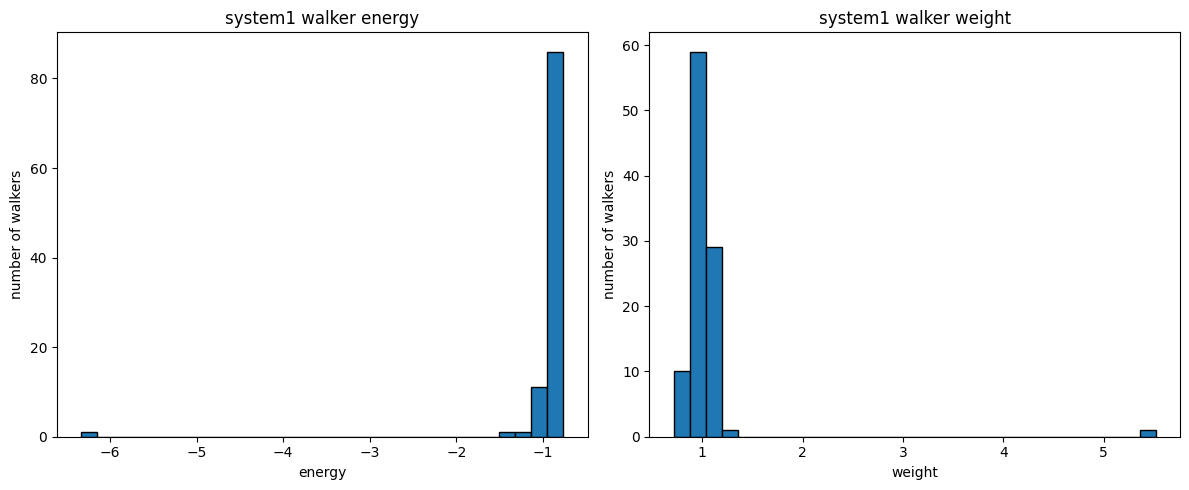

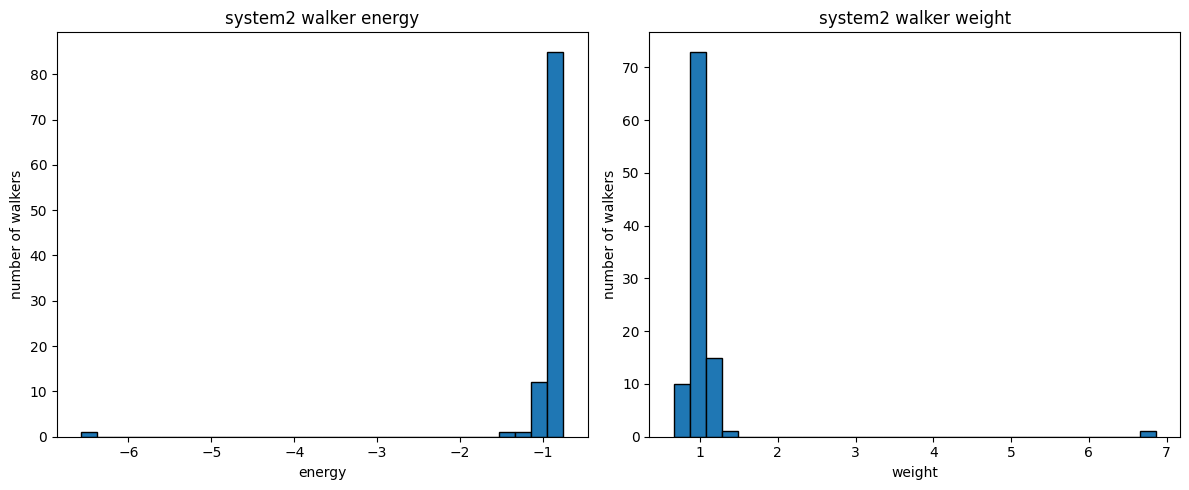

In [2]:
### investigate walkers at step 7 ###

walker_data = '''
# walkers analyze of the last step
# the energy system1 is -1.135239
# the energy system2 is -1.213034
# walker   system1_en      system1_wt      system2_en      system2_wt
1        -0.926571       1.144310        -0.923138       1.149057
2        -0.770891       0.991109        -0.761602       0.984945
3        -0.777341       1.041629        -0.769201       1.047335
4        -0.915252       0.889610        -0.939848       0.890843
5        -0.786599       0.959346        -0.777033       0.956737
6        -0.906101       0.982010        -0.905395       0.979680
7        -0.770419       0.875246        -0.756316       0.878219
8        -0.945518       1.083760        -0.952215       1.092903
9        -0.827925       0.977970        -0.823937       0.974545
10       -0.776265       1.065106        -0.765020       1.058610
11       -1.026451       1.113318        -1.033821       1.122085
12       -1.054531       0.951357        -1.041961       0.948001
13       -0.878350       0.905339        -0.861596       0.897007
14       -0.781460       0.963538        -0.770757       0.960758
15       -0.798389       1.020428        -0.784949       1.015550
16       -0.822605       0.970820        -0.816132       0.969764
17       -0.772330       1.117347        -0.761936       1.126319
18       -0.812588       0.967886        -0.804593       0.966954
19       -0.818083       1.072219        -0.811167       1.079244
20       -0.764727       0.979060        -0.754239       0.977805
21       -0.782452       1.056854        -0.773018       1.061924
22       -0.770670       1.024563        -0.760015       1.025981
23       -0.784588       1.047843        -0.774258       1.050057
24       -0.807213       0.977322        -0.799974       0.974920
25       -0.792773       0.916442        -0.783385       0.915865
26       -0.769094       0.940665        -0.758694       0.935831
27       -0.767308       1.007684        -0.756707       1.007510
28       -0.893372       1.117848        -0.886260       1.114425
29       -0.894249       0.981140        -0.892302       0.981598
30       -0.977481       0.981146        -0.996457       0.987441
31       -0.763348       1.092974        -0.752931       1.090537
32       -0.766293       0.967988        -0.756054       0.965442
33       -0.785251       1.051254        -0.773987       1.054778
34       -0.818437       0.987952        -0.811203       0.990030
35       -0.775108       0.968641        -0.764619       0.964291
36       -0.793675       0.927102        -0.781146       0.921181
37       -0.780381       1.144869        -0.770474       1.156751
38       -0.802839       0.997433        -0.799677       0.998287
39       -0.775263       0.904122        -0.764573       0.897087
40       -0.859503       0.967941        -0.863234       0.973359
41       -0.769712       0.995607        -0.759782       0.990139
42       -0.783548       0.953329        -0.774414       0.948667
43       -0.802885       1.082414        -0.795671       1.084892
44       -0.792006       1.038631        -0.782905       1.037826
45       -0.803552       1.031686        -0.799301       1.036815
46       -0.847345       0.900019        -0.841429       0.895279
47       -0.889967       1.096258        -0.882559       1.107675
48       -0.766424       0.976078        -0.756046       0.975075
49       -0.793540       0.927769        -0.788036       0.926865
50       -0.787983       1.025841        -0.775771       1.025870
51       -0.781421       0.968112        -0.769954       0.966630
52       -0.785084       1.040030        -0.777923       1.043158
53       -0.767060       0.971171        -0.756743       0.969953
54       -0.765744       1.002918        -0.755738       1.003516
55       -0.763892       0.819040        -0.756288       0.812490
56       -0.772784       1.098309        -0.762614       1.102346
57       -0.828658       1.035408        -0.815554       1.031225
58       -0.767876       0.974776        -0.757861       0.972880
59       -1.423779       0.966610        -1.462106       0.968226
60       -0.860992       1.119219        -0.860521       1.124510
61       -0.788736       0.931011        -0.779684       0.929562
62       -0.828169       0.914360        -0.822405       0.910616
63       -0.785857       0.933645        -0.774903       0.930852
64       -0.875493       1.051514        -0.868883       1.054883
65       -0.812218       0.998127        -0.807150       0.998851
66       -0.770449       0.984664        -0.760183       0.989479
67       -0.884439       1.016982        -0.886830       1.018904
68       -0.767289       0.996091        -0.757050       0.991619
69       -0.964583       1.177150        -0.969433       1.183945
70       -0.792345       1.009157        -0.778104       1.004191
71       -0.784085       0.885789        -0.773733       0.882090
72       -0.996688       0.923663        -0.989024       0.922429
73       -1.000612       1.072994        -0.984948       1.069284
74       -0.778546       1.060682        -0.767233       1.065297
75       -0.782855       1.012229        -0.774355       1.009015
76       -0.874427       0.889290        -0.874439       0.883597
77       -0.796758       1.011122        -0.789513       1.013880
78       -0.867777       1.059632        -0.853423       1.059308
79       -1.088371       1.095921        -1.095706       1.101131
80       -0.816444       1.044319        -0.810371       1.052332
81       -1.173784       1.266235        -1.162101       1.281494
82       -0.799453       0.920771        -0.788089       0.913343
83       -0.801806       1.162227        -0.791896       1.174137
84       -0.873588       1.035260        -0.861701       1.037824
85       -0.783710       0.912495        -0.776192       0.908799
86       -0.775645       0.938184        -0.765263       0.935547
87       -0.768432       0.937400        -0.758504       0.933538
88       -0.789189       0.919991        -0.779906       0.916133
89       -1.036782       0.961148        -1.029067       0.956447
90       -0.783473       0.977705        -0.776761       0.975465
91       -6.334997       5.521499        -6.572141       6.860883
92       -1.020677       0.853840        -1.006898       0.787625
93       -0.782601       0.719440        -0.770171       0.662739
94       -0.768488       0.753559        -0.758061       0.692669
95       -0.767002       0.714427        -0.757281       0.660250
96       -0.837177       0.816808        -0.828497       0.757552
97       -1.024579       0.802297        -1.029692       0.743050
98       -0.802663       0.820184        -0.792437       0.759847
99       -0.983823       0.826297        -0.973162       0.759921
100      -0.785846       0.855575        -0.778165       0.793962
'''

walker_en1 = []
walker_wt1 = []
walker_en2 = []
walker_wt2 = []
lines = walker_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 1:
            walker_en1.append(columns[1])
        if len(columns) > 2:
            walker_wt1.append(columns[2])
        if len(columns) > 3:
            walker_en2.append(columns[3])
        if len(columns) > 4:
            walker_wt2.append(columns[4])

walker_en1 = np.array(walker_en1,dtype='float32')
walker_wt1 = np.array(walker_wt1,dtype='float32')
walker_en2 = np.array(walker_en2,dtype='float32')
walker_wt2 = np.array(walker_wt2,dtype='float32')



# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot data in the first subplot
ax1.hist(walker_en1 , bins=30, edgecolor='black')  
ax1.set_title("system1 walker energy")
ax1.set_xlabel("energy")
ax1.set_ylabel("number of walkers")


# Plot data in the second subplot
ax2.hist(walker_wt1 , bins=30, edgecolor='black')  
ax2.set_title("system1 walker weight")
ax2.set_xlabel("weight")
ax2.set_ylabel("number of walkers")


# Adjust layout and display the plot
plt.tight_layout()
plt.show()



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot data in the first subplot
ax1.hist(walker_en2 , bins=30, edgecolor='black')  
ax1.set_title("system2 walker energy")
ax1.set_xlabel("energy")
ax1.set_ylabel("number of walkers")


# Plot data in the second subplot
ax2.hist(walker_wt2 , bins=30, edgecolor='black')  
ax2.set_title("system2 walker weight")
ax2.set_xlabel("weight")
ax2.set_ylabel("number of walkers")


# Adjust layout and display the plot
plt.tight_layout()
plt.show()

the energy of system 1 is -0.8340511717693198
the energy of system 2 is -0.8262635242209322
the energy difference is -0.007787647548387566


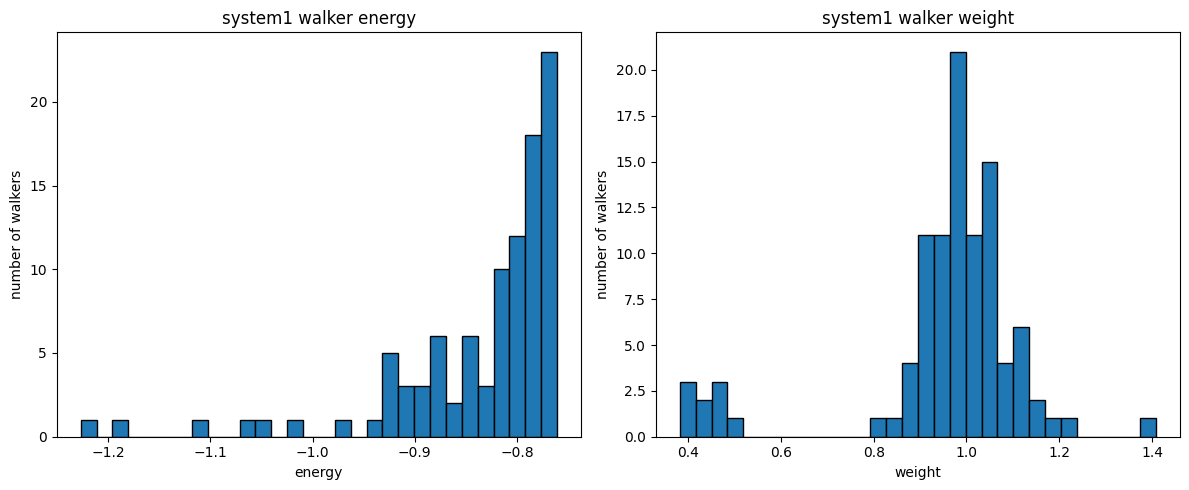

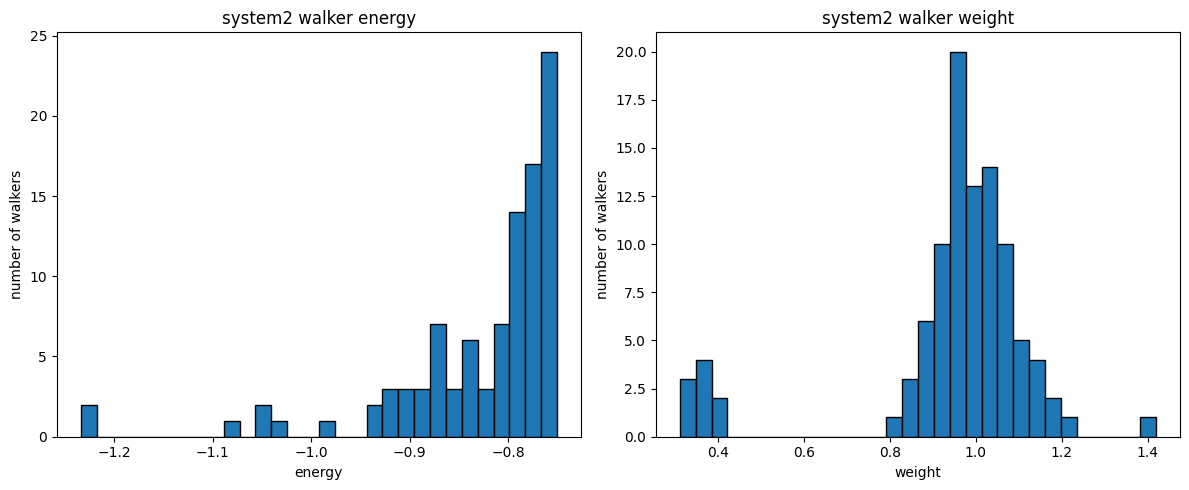

In [9]:
### investigate walkers at step 8 ###

walker_data = '''
# walkers analyze of the last step
# the energy system1 is -0.877062
# the energy system2 is -0.872486
# walker 	 system1_en 	 system1_wt 	 	 overlap1 	 imp1 	 system2_en 	 system2_wt 	 	 overlap2 	 imp2
  1 	 	  -0.898605 	 1.144134 	  0.073219+-0.594774j 	 1.002519  -0.885153 	 1.145468 	   0.071730+-0.606637j 	 1.002481
  2 	 	  -0.767695 	 0.973710 	  -0.818209+-0.224380j 	 0.999850  -0.757329 	 0.965271 	   -0.826946+-0.198260j 	 0.999843
  3 	 	  -0.802587 	 1.035998 	  -0.460872+-0.006869j 	 1.001083  -0.796840 	 1.041112 	   -0.456568+-0.032869j 	 1.001100
  4 	 	  -0.905516 	 0.882443 	  -0.489250+-0.215572j 	 0.996204  -0.924270 	 0.885919 	   -0.481798+-0.144679j 	 0.995758
  5 	 	  -0.788690 	 0.976474 	  0.648166+0.235731j 	 0.998563  -0.778502 	 0.972497 	   0.645999+0.241399j 	 0.998403
  6 	 	  -0.906779 	 1.051769 	  0.419766+-0.321071j 	 0.999958  -0.905708 	 1.053156 	   0.403014+-0.331956j 	 1.000060
  7 	 	  -0.761642 	 0.831985 	  0.141300+0.685233j 	 0.987469  -0.752653 	 0.832716 	   0.238254+0.648683j 	 0.987052
  8 	 	  -1.014736 	 1.132135 	  -0.127047+0.422677j 	 1.001517  -1.030656 	 1.147343 	   -0.164261+0.393526j 	 1.001704
  9 	 	  -0.848647 	 0.973486 	  0.630970+-0.243661j 	 0.991264  -0.847583 	 0.972117 	   0.631382+-0.205508j 	 0.991313
  10 	 	  -0.768507 	 1.042698 	  -0.555449+-0.654085j 	 1.000275  -0.757619 	 1.034822 	   -0.528579+-0.679014j 	 1.000253
  11 	 	  -1.187983 	 1.211285 	  0.063226+0.264640j 	 1.002014  -1.217635 	 1.231510 	   0.077332+0.250219j 	 1.001864
  12 	 	  -0.858514 	 0.989167 	  0.629186+0.201039j 	 1.001252  -0.842765 	 0.982916 	   0.655345+0.152033j 	 1.001087
  13 	 	  -0.810705 	 0.874778 	  0.112870+0.573595j 	 0.996770  -0.797220 	 0.864511 	   0.094877+0.584988j 	 0.996838
  14 	 	  -0.766175 	 0.946760 	  0.286670+-0.866952j 	 0.998847  -0.754990 	 0.943009 	   0.302991+-0.862390j 	 0.998911
  15 	 	  -0.771830 	 1.015280 	  0.283637+0.758046j 	 0.997283  -0.761481 	 1.009149 	   0.339351+0.725056j 	 0.997262
  16 	 	  -0.820155 	 0.952526 	  0.605904+0.344764j 	 0.999918  -0.811628 	 0.950241 	   0.606294+0.345095j 	 0.999731
  17 	 	  -0.801953 	 1.070831 	  -0.410746+0.356866j 	 1.000100  -0.793904 	 1.077764 	   -0.402072+0.360379j 	 1.000030
  18 	 	  -0.789548 	 0.946549 	  -0.757921+0.162390j 	 0.999796  -0.779923 	 0.945384 	   -0.754807+0.179847j 	 0.999793
  19 	 	  -0.924384 	 1.064716 	  -0.265826+0.482179j 	 0.997372  -0.913187 	 1.071925 	   -0.286611+0.480053j 	 0.997323
  20 	 	  -0.793464 	 0.975688 	  0.698875+0.186713j 	 0.996735  -0.783911 	 0.973385 	   0.697938+0.185316j 	 0.996675
  21 	 	  -0.782779 	 1.057142 	  0.667711+-0.288764j 	 1.001055  -0.772710 	 1.061199 	   0.676720+-0.265109j 	 1.001073
  22 	 	  -0.797445 	 1.020786 	  0.745304+-0.208035j 	 1.001334  -0.785996 	 1.021462 	   0.746936+-0.224030j 	 1.001358
  23 	 	  -0.793520 	 1.039326 	  0.717289+0.052005j 	 1.001874  -0.783111 	 1.039990 	   0.714868+0.080370j 	 1.001906
  24 	 	  -0.877371 	 0.943921 	  0.436938+-0.400365j 	 1.003282  -0.878573 	 0.941531 	   0.440026+-0.378157j 	 1.003448
  25 	 	  -0.774280 	 0.936980 	  -0.699838+0.362710j 	 0.996773  -0.763689 	 0.936598 	   -0.713352+0.337923j 	 0.996742
  26 	 	  -0.806279 	 0.926849 	  -0.018199+0.656369j 	 1.001865  -0.798119 	 0.921208 	   -0.017839+0.653157j 	 1.001914
  27 	 	  -0.788372 	 0.996666 	  0.353530+-0.703175j 	 0.999820  -0.782179 	 0.995022 	   0.393799+-0.670739j 	 0.999850
  28 	 	  -0.830789 	 1.111719 	  0.401723+0.479917j 	 1.002265  -0.819059 	 1.107301 	   0.405863+0.486803j 	 1.002271
  29 	 	  -0.903447 	 0.968782 	  -0.340772+0.398870j 	 1.001008  -0.894939 	 0.968698 	   -0.345511+0.399640j 	 1.000964
  30 	 	  -0.924974 	 1.016794 	  0.237412+-0.441612j 	 1.001756  -0.928298 	 1.028508 	   0.184579+-0.458719j 	 1.001613
  31 	 	  -0.762007 	 1.093965 	  -0.170712+-0.926923j 	 1.001627  -0.751702 	 1.091086 	   -0.136020+-0.932759j 	 1.001701
  32 	 	  -0.769620 	 0.985052 	  -0.094910+0.788743j 	 0.998912  -0.756626 	 0.981444 	   0.020142+0.796806j 	 0.998820
  33 	 	  -0.788789 	 1.057137 	  -0.649364+0.342310j 	 1.000453  -0.778117 	 1.058982 	   -0.654788+0.339515j 	 1.000512
  34 	 	  -0.837210 	 1.020927 	  0.470848+-0.264986j 	 1.000023  -0.838417 	 1.026738 	   0.480728+-0.206575j 	 1.000206
  35 	 	  -0.771366 	 0.942077 	  0.771823+-0.127762j 	 0.999786  -0.761164 	 0.937662 	   0.773770+-0.111326j 	 0.999757
  36 	 	  -0.800479 	 0.947106 	  0.602538+-0.038071j 	 1.000777  -0.787580 	 0.940881 	   0.603529+-0.080287j 	 1.000733
  37 	 	  -0.777076 	 1.105207 	  0.779061+0.077127j 	 0.997759  -0.767184 	 1.112835 	   0.779653+0.048178j 	 0.997821
  38 	 	  -0.788903 	 0.949855 	  -0.009941+0.769365j 	 1.001927  -0.782447 	 0.950357 	   0.043887+0.760292j 	 1.001960
  39 	 	  -0.785058 	 0.910833 	  0.004132+0.737853j 	 1.002626  -0.775095 	 0.903427 	   -0.007499+0.738086j 	 1.002659
  40 	 	  -0.925605 	 0.989158 	  0.420164+0.060750j 	 0.992029  -0.935521 	 0.998297 	   0.418568+0.014428j 	 0.991245
  41 	 	  -0.775292 	 0.997653 	  0.605392+-0.619884j 	 1.000550  -0.765992 	 0.991131 	   0.610853+-0.611906j 	 1.000571
  42 	 	  -0.818904 	 0.975366 	  -0.276640+0.605205j 	 1.002600  -0.808259 	 0.970704 	   -0.273418+0.611626j 	 1.002643
  43 	 	  -0.773451 	 1.062224 	  0.084408+-0.818829j 	 0.999845  -0.763385 	 1.064076 	   0.102802+-0.815739j 	 0.999916
  44 	 	  -0.794115 	 1.054183 	  0.552640+0.436041j 	 1.002341  -0.785851 	 1.052111 	   0.550968+0.430987j 	 1.002393
  45 	 	  -0.963242 	 1.047297 	  -0.222080+-0.385843j 	 0.995663  -0.983733 	 1.055955 	   -0.253906+-0.336227j 	 0.995774
  46 	 	  -0.828846 	 0.894300 	  -0.020202+-0.634484j 	 0.996368  -0.820435 	 0.888569 	   -0.022640+-0.635530j 	 0.996007
  47 	 	  -0.879558 	 1.120046 	  0.398135+-0.398145j 	 1.003152  -0.872632 	 1.132414 	   0.381753+-0.414740j 	 1.003183
  48 	 	  -0.803821 	 0.929280 	  0.606178+-0.408477j 	 1.002595  -0.793819 	 0.927027 	   0.616051+-0.397987j 	 1.002651
  49 	 	  -0.801665 	 0.909398 	  0.704841+0.254226j 	 0.996480  -0.795897 	 0.908935 	   0.677570+0.296660j 	 0.996497
  50 	 	  -0.780922 	 1.011596 	  0.695267+-0.179687j 	 1.001044  -0.770718 	 1.009714 	   0.704217+-0.115735j 	 1.001101
  51 	 	  -0.805718 	 0.957777 	  0.715666+-0.210122j 	 1.001778  -0.800305 	 0.956998 	   0.714981+-0.180298j 	 1.001908
  52 	 	  -0.787719 	 1.024326 	  0.027735+0.788975j 	 0.996940  -0.776438 	 1.026008 	   0.087962+0.788268j 	 0.996785
  53 	 	  -0.840684 	 0.968286 	  0.401070+-0.505017j 	 0.999862  -0.835404 	 0.966057 	   0.388278+-0.508058j 	 0.999866
  54 	 	  -0.809581 	 0.993619 	  0.332716+-0.638173j 	 1.001948  -0.802907 	 0.994040 	   0.351731+-0.622793j 	 1.002013
  55 	 	  -0.774276 	 0.816657 	  0.687333+-0.006804j 	 0.999222  -0.764381 	 0.810243 	   0.687609+-0.032599j 	 0.999232
  56 	 	  -0.771147 	 1.116302 	  0.698051+0.206140j 	 1.000895  -0.760656 	 1.121218 	   0.700043+0.199130j 	 1.000942
  57 	 	  -0.807360 	 1.051556 	  -0.100322+-0.653507j 	 0.997670  -0.794504 	 1.046299 	   -0.129393+-0.652944j 	 0.997473
  58 	 	  -0.765848 	 0.975026 	  0.128565+0.882484j 	 0.997469  -0.755730 	 0.972017 	   0.125397+0.882587j 	 0.997249
  59 	 	  -0.876058 	 1.024644 	  0.186262+-0.553194j 	 1.001984  -0.866476 	 1.029442 	   0.169755+-0.565116j 	 1.002032
  60 	 	  -0.875180 	 1.092803 	  0.628797+0.036136j 	 0.999752  -0.871501 	 1.099775 	   0.625545+0.002772j 	 0.999779
  61 	 	  -0.871686 	 0.960445 	  0.649728+-0.026316j 	 1.002752  -0.868678 	 0.960600 	   0.644303+-0.004725j 	 1.002817
  62 	 	  -0.809904 	 0.916176 	  0.504089+0.499051j 	 1.000715  -0.804433 	 0.912573 	   0.516100+0.473212j 	 1.000715
  63 	 	  -0.771142 	 0.923251 	  -0.277533+-0.824542j 	 0.994119  -0.759701 	 0.919981 	   -0.193143+-0.850654j 	 0.993888
  64 	 	  -0.897325 	 1.048118 	  0.315828+-0.494883j 	 1.000922  -0.887986 	 1.050253 	   0.325565+-0.496214j 	 1.000987
  65 	 	  -0.760673 	 0.977957 	  -0.466786+0.781275j 	 0.997516  -0.750507 	 0.979729 	   -0.462406+0.784483j 	 0.997620
  66 	 	  -0.774560 	 0.990041 	  0.381910+-0.790339j 	 0.999534  -0.763403 	 0.994770 	   0.327032+-0.817051j 	 0.999412
  67 	 	  -0.819300 	 1.037908 	  -0.529078+-0.508928j 	 1.001710  -0.816378 	 1.041545 	   -0.493068+-0.526022j 	 1.001802
  68 	 	  -0.768874 	 0.985244 	  0.862679+0.190245j 	 1.001523  -0.758152 	 0.979820 	   0.867795+0.170989j 	 1.001557
  69 	 	  -0.878929 	 1.186354 	  -0.271664+-0.492320j 	 1.000430  -0.875822 	 1.192879 	   -0.241358+-0.500610j 	 1.000450
  70 	 	  -0.770156 	 1.000159 	  -0.641445+0.525408j 	 0.996264  -0.759663 	 0.993791 	   -0.605841+0.570838j 	 0.996355
  71 	 	  -0.776965 	 0.867327 	  -0.446901+0.590978j 	 1.002530  -0.766460 	 0.863971 	   -0.462473+0.581434j 	 1.002573
  72 	 	  -0.808179 	 0.966942 	  -0.131145+0.754582j 	 1.002337  -0.796851 	 0.964850 	   -0.133107+0.762047j 	 1.002357
  73 	 	  -0.863854 	 1.074388 	  0.511784+0.208692j 	 1.003156  -0.851114 	 1.070005 	   0.521067+0.201996j 	 1.003110
  74 	 	  -0.786965 	 1.055278 	  0.763022+0.222076j 	 1.001051  -0.776129 	 1.059147 	   0.770548+0.210353j 	 1.001070
  75 	 	  -0.792116 	 0.971255 	  0.350341+0.642683j 	 0.995660  -0.783103 	 0.966911 	   0.351818+0.639668j 	 0.995521
  76 	 	  -0.842329 	 0.898262 	  -0.346285+0.350568j 	 1.000887  -0.834718 	 0.893105 	   -0.337372+0.361113j 	 1.000940
  77 	 	  -0.780393 	 1.002380 	  -0.087773+-0.738142j 	 0.998851  -0.771773 	 1.005279 	   -0.045389+-0.735701j 	 0.998888
  78 	 	  -0.888616 	 1.026870 	  0.247923+0.500709j 	 0.993761  -0.874242 	 1.024770 	   0.275674+0.499654j 	 0.993842
  79 	 	  -0.937214 	 1.159336 	  0.441983+0.231933j 	 1.001815  -0.923870 	 1.166042 	   0.451486+0.242995j 	 1.001816
  80 	 	  -0.842273 	 1.036822 	  0.231340+-0.535029j 	 0.999718  -0.840544 	 1.045722 	   0.272064+-0.502596j 	 0.999839
  81 	 	  -1.103286 	 1.408675 	  0.099019+-0.362330j 	 0.996449  -1.079754 	 1.419814 	   0.110411+-0.375938j 	 0.996020
  82 	 	  -0.779264 	 0.897767 	  0.571823+-0.481434j 	 0.999400  -0.769044 	 0.890873 	   0.589355+-0.461919j 	 0.999418
  83 	 	  -0.765746 	 1.133358 	  0.555037+-0.451098j 	 1.000216  -0.754784 	 1.143971 	   0.562057+-0.447377j 	 1.000284
  84 	 	  -0.791008 	 1.032130 	  -0.087709+-0.782128j 	 0.995825  -0.779501 	 1.035913 	   -0.073352+-0.789293j 	 0.995837
  85 	 	  -0.768125 	 0.897070 	  -0.024899+-0.842916j 	 0.999879  -0.758029 	 0.894033 	   0.015822+-0.842954j 	 0.999927
  86 	 	  -0.779386 	 0.901428 	  0.111629+0.748858j 	 1.000425  -0.768986 	 0.897780 	   0.141712+0.743791j 	 1.000497
  87 	 	  -0.783542 	 0.931420 	  -0.789000+-0.007198j 	 0.997939  -0.776427 	 0.928434 	   -0.780791+-0.042857j 	 0.998078
  88 	 	  -0.811400 	 0.912182 	  0.649848+-0.097396j 	 0.997624  -0.806605 	 0.909153 	   0.636449+-0.117518j 	 0.997512
  89 	 	  -0.922507 	 0.977992 	  0.051204+-0.551596j 	 1.002008  -0.906800 	 0.972492 	   0.059404+-0.564894j 	 1.001954
  90 	 	  -0.850125 	 0.975471 	  -0.109995+-0.652019j 	 1.001544  -0.853246 	 0.975177 	   -0.035171+-0.640580j 	 1.001639
# 91 	 	  -1.509400 	 6.410432 	  -0.016215+-0.176104j 	 0.998565  -1.476355 	 7.160126 	   -0.037621+-0.182141j 	 0.998114
  92 	 	  -0.918375 	 0.473597 	  -0.207948+-0.380545j 	 0.995407  -0.902962 	 0.389333 	   -0.216722+-0.389467j 	 0.995122
  93 	 	  -0.770002 	 0.382388 	  0.587123+0.519517j 	 0.998144  -0.759604 	 0.311558 	   0.547211+0.551648j 	 0.997715
  94 	 	  -0.817987 	 0.405198 	  0.589708+-0.363308j 	 0.996607  -0.804170 	 0.329471 	   0.621524+-0.326312j 	 0.996290
  95 	 	  -0.769630 	 0.384073 	  0.370279+-0.777791j 	 0.995334  -0.759735 	 0.314397 	   0.419315+-0.750894j 	 0.994882
  96 	 	  -0.839333 	 0.449260 	  0.496311+0.287741j 	 0.996086  -0.831446 	 0.369427 	   0.481494+0.309457j 	 0.995846
  97 	 	  -1.226916 	 0.458780 	  0.078240+-0.198562j 	 0.999425  -1.233742 	 0.377793 	   0.067517+-0.200708j 	 0.999387
  98 	 	  -1.045066 	 0.439304 	  0.265978+0.075934j 	 1.000986  -1.047572 	 0.360132 	   0.265287+0.070840j 	 1.000829
  99 	 	  -1.062868 	 0.506636 	  -0.181552+-0.300241j 	 0.998710  -1.046224 	 0.412637 	   -0.177995+-0.315890j 	 0.998392
  100 	 	  -0.789069 	 0.459651 	  0.223899+0.654163j 	 0.990515  -0.781591 	 0.377702 	   0.270771+0.626729j 	 0.990283
'''

walker_en1 = []
walker_wt1 = []
walker_en2 = []
walker_wt2 = []
walker_en1_idx = 1
walker_wt1_idx = 2
walker_en2_idx = 5
walker_wt2_idx = 6

lines = walker_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > walker_en1_idx:
            walker_en1.append(columns[walker_en1_idx])
        if len(columns) > walker_wt1_idx:
            walker_wt1.append(columns[walker_wt1_idx])
        if len(columns) > walker_en2_idx:
            walker_en2.append(columns[walker_en2_idx])
        if len(columns) > walker_wt2_idx:
            walker_wt2.append(columns[walker_wt2_idx])

walker_en1 = np.array(walker_en1,dtype='float32')
walker_wt1 = np.array(walker_wt1,dtype='float32')
walker_en2 = np.array(walker_en2,dtype='float32')
walker_wt2 = np.array(walker_wt2,dtype='float32')

en1 = sum(walker_en1*walker_wt1)/sum(walker_wt1)
en2 = sum(walker_en2*walker_wt2)/sum(walker_wt2)

print(f'the energy of system 1 is {en1}')
print(f'the energy of system 2 is {en2}')
print(f'the energy difference is {en1-en2}')

# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot data in the first subplot
ax1.hist(walker_en1 , bins=30, edgecolor='black')  
ax1.set_title("system1 walker energy")
ax1.set_xlabel("energy")
ax1.set_ylabel("number of walkers")


# Plot data in the second subplot
ax2.hist(walker_wt1 , bins=30, edgecolor='black')  
ax2.set_title("system1 walker weight")
ax2.set_xlabel("weight")
ax2.set_ylabel("number of walkers")


# Adjust layout and display the plot
plt.tight_layout()
plt.show()



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot data in the first subplot
ax1.hist(walker_en2 , bins=30, edgecolor='black')  
ax1.set_title("system2 walker energy")
ax1.set_xlabel("energy")
ax1.set_ylabel("number of walkers")


# Plot data in the second subplot
ax2.hist(walker_wt2 , bins=30, edgecolor='black')  
ax2.set_title("system2 walker weight")
ax2.set_xlabel("weight")
ax2.set_ylabel("number of walkers")


# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [5]:
### remove walker 91
### investigate walkers at step 7 ###

walker_data = '''
# walkers analyze of the last step
# the energy system1 is -1.135239
# the energy system2 is -1.213034
# walker   system1_en      system1_wt      system2_en      system2_wt
1        -0.926571       1.144310        -0.923138       1.149057
2        -0.770891       0.991109        -0.761602       0.984945
3        -0.777341       1.041629        -0.769201       1.047335
4        -0.915252       0.889610        -0.939848       0.890843
5        -0.786599       0.959346        -0.777033       0.956737
6        -0.906101       0.982010        -0.905395       0.979680
7        -0.770419       0.875246        -0.756316       0.878219
8        -0.945518       1.083760        -0.952215       1.092903
9        -0.827925       0.977970        -0.823937       0.974545
10       -0.776265       1.065106        -0.765020       1.058610
11       -1.026451       1.113318        -1.033821       1.122085
12       -1.054531       0.951357        -1.041961       0.948001
13       -0.878350       0.905339        -0.861596       0.897007
14       -0.781460       0.963538        -0.770757       0.960758
15       -0.798389       1.020428        -0.784949       1.015550
16       -0.822605       0.970820        -0.816132       0.969764
17       -0.772330       1.117347        -0.761936       1.126319
18       -0.812588       0.967886        -0.804593       0.966954
19       -0.818083       1.072219        -0.811167       1.079244
20       -0.764727       0.979060        -0.754239       0.977805
21       -0.782452       1.056854        -0.773018       1.061924
22       -0.770670       1.024563        -0.760015       1.025981
23       -0.784588       1.047843        -0.774258       1.050057
24       -0.807213       0.977322        -0.799974       0.974920
25       -0.792773       0.916442        -0.783385       0.915865
26       -0.769094       0.940665        -0.758694       0.935831
27       -0.767308       1.007684        -0.756707       1.007510
28       -0.893372       1.117848        -0.886260       1.114425
29       -0.894249       0.981140        -0.892302       0.981598
30       -0.977481       0.981146        -0.996457       0.987441
31       -0.763348       1.092974        -0.752931       1.090537
32       -0.766293       0.967988        -0.756054       0.965442
33       -0.785251       1.051254        -0.773987       1.054778
34       -0.818437       0.987952        -0.811203       0.990030
35       -0.775108       0.968641        -0.764619       0.964291
36       -0.793675       0.927102        -0.781146       0.921181
37       -0.780381       1.144869        -0.770474       1.156751
38       -0.802839       0.997433        -0.799677       0.998287
39       -0.775263       0.904122        -0.764573       0.897087
40       -0.859503       0.967941        -0.863234       0.973359
41       -0.769712       0.995607        -0.759782       0.990139
42       -0.783548       0.953329        -0.774414       0.948667
43       -0.802885       1.082414        -0.795671       1.084892
44       -0.792006       1.038631        -0.782905       1.037826
45       -0.803552       1.031686        -0.799301       1.036815
46       -0.847345       0.900019        -0.841429       0.895279
47       -0.889967       1.096258        -0.882559       1.107675
48       -0.766424       0.976078        -0.756046       0.975075
49       -0.793540       0.927769        -0.788036       0.926865
50       -0.787983       1.025841        -0.775771       1.025870
51       -0.781421       0.968112        -0.769954       0.966630
52       -0.785084       1.040030        -0.777923       1.043158
53       -0.767060       0.971171        -0.756743       0.969953
54       -0.765744       1.002918        -0.755738       1.003516
55       -0.763892       0.819040        -0.756288       0.812490
56       -0.772784       1.098309        -0.762614       1.102346
57       -0.828658       1.035408        -0.815554       1.031225
58       -0.767876       0.974776        -0.757861       0.972880
59       -1.423779       0.966610        -1.462106       0.968226
60       -0.860992       1.119219        -0.860521       1.124510
61       -0.788736       0.931011        -0.779684       0.929562
62       -0.828169       0.914360        -0.822405       0.910616
63       -0.785857       0.933645        -0.774903       0.930852
64       -0.875493       1.051514        -0.868883       1.054883
65       -0.812218       0.998127        -0.807150       0.998851
66       -0.770449       0.984664        -0.760183       0.989479
67       -0.884439       1.016982        -0.886830       1.018904
68       -0.767289       0.996091        -0.757050       0.991619
69       -0.964583       1.177150        -0.969433       1.183945
70       -0.792345       1.009157        -0.778104       1.004191
71       -0.784085       0.885789        -0.773733       0.882090
72       -0.996688       0.923663        -0.989024       0.922429
73       -1.000612       1.072994        -0.984948       1.069284
74       -0.778546       1.060682        -0.767233       1.065297
75       -0.782855       1.012229        -0.774355       1.009015
76       -0.874427       0.889290        -0.874439       0.883597
77       -0.796758       1.011122        -0.789513       1.013880
78       -0.867777       1.059632        -0.853423       1.059308
79       -1.088371       1.095921        -1.095706       1.101131
80       -0.816444       1.044319        -0.810371       1.052332
81       -1.173784       1.266235        -1.162101       1.281494
82       -0.799453       0.920771        -0.788089       0.913343
83       -0.801806       1.162227        -0.791896       1.174137
84       -0.873588       1.035260        -0.861701       1.037824
85       -0.783710       0.912495        -0.776192       0.908799
86       -0.775645       0.938184        -0.765263       0.935547
87       -0.768432       0.937400        -0.758504       0.933538
88       -0.789189       0.919991        -0.779906       0.916133
89       -1.036782       0.961148        -1.029067       0.956447
90       -0.783473       0.977705        -0.776761       0.975465
# 91       -6.334997       5.521499        -6.572141       6.860883
92       -1.020677       0.853840        -1.006898       0.787625
93       -0.782601       0.719440        -0.770171       0.662739
94       -0.768488       0.753559        -0.758061       0.692669
95       -0.767002       0.714427        -0.757281       0.660250
96       -0.837177       0.816808        -0.828497       0.757552
97       -1.024579       0.802297        -1.029692       0.743050
98       -0.802663       0.820184        -0.792437       0.759847
99       -0.983823       0.826297        -0.973162       0.759921
100      -0.785846       0.855575        -0.778165       0.793962
'''

walker_en1 = []
walker_wt1 = []
walker_en2 = []
walker_wt2 = []
lines = walker_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 1:
            walker_en1.append(columns[1])
        if len(columns) > 2:
            walker_wt1.append(columns[2])
        if len(columns) > 3:
            walker_en2.append(columns[3])
        if len(columns) > 4:
            walker_wt2.append(columns[4])

walker_en1 = np.array(walker_en1,dtype='float32')
walker_wt1 = np.array(walker_wt1,dtype='float32')
walker_en2 = np.array(walker_en2,dtype='float32')
walker_wt2 = np.array(walker_wt2,dtype='float32')
en1 = sum(walker_en1*walker_wt1)/sum(walker_wt1)
en2 = sum(walker_en2*walker_wt2)/sum(walker_wt2)
print(f'after remove the outliner system1 energy is {en1:.6f}')
print(f'after remove the outliner system2 energy is {en2:.6f}')
print(f'after remove the outliner energy difference is {en1-en2:.6f}')

after remove the outliner system1 energy is -0.840527
after remove the outliner system2 energy is -0.833547
after remove the outliner energy difference is -0.006979


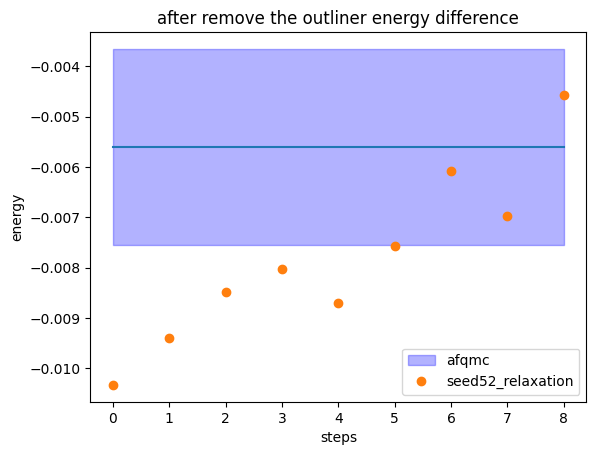

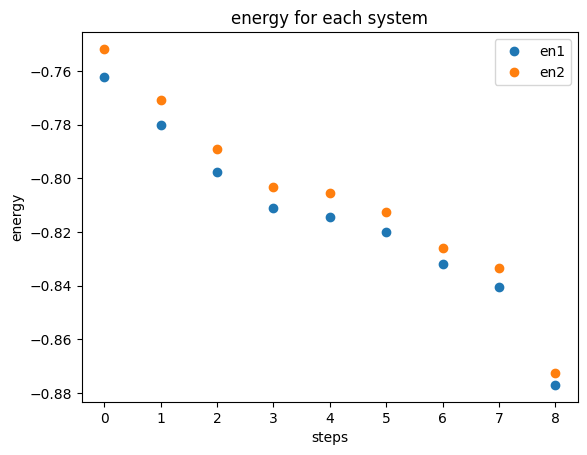

In [7]:
### new step 7 energy after remove the outliner 
rlx_data = '''
# relaxation from mean-field object using 100 walkers
# rlx_step       system1_en      system2_en      en_diff
    0            -0.762049       -0.751719       -0.010331
    1            -0.780147       -0.770754       -0.009392
    2            -0.797634       -0.789149       -0.008484
    3            -0.811106       -0.803070       -0.008036
    4            -0.814336       -0.805636       -0.008700
    5            -0.820182       -0.812610       -0.007571
    6            -0.831913       -0.825825       -0.006088
    7            -0.840527       -0.833547       -0.006979
    8            -0.877062       -0.872486       -0.004575
# relaxation time: 26.37
'''

step = []
en_diff = []
en1 = []
en2 = []
lines = rlx_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 0:
            step.append(columns[0])
        if len(columns) > 1:
            en1.append(columns[1])
        if len(columns) > 2:
            en2.append(columns[2])
        if len(columns) > 3:
            en_diff.append(columns[3])

step = np.array(step,dtype='float32')
en1 = np.array(en1,dtype='float32')
en2 = np.array(en2,dtype='float32')
en_diff = np.array(en_diff,dtype='float32')


afqmc_en_diff = -0.005606581337333716
afqmc_en_diff_err = 0.0019502384765517759
x_steps = np.linspace(0,max(step),100)
afqmc_en = np.array([afqmc_en_diff]*len(x_steps))
afqmc_lw = afqmc_en-afqmc_en_diff_err
afqmc_up = afqmc_en+afqmc_en_diff_err
plt.plot(x_steps,afqmc_en)
plt.fill_between(x_steps, afqmc_lw, afqmc_up, color='blue', alpha=0.3, label='afqmc')
plt.plot(step,en_diff,'o',label='seed52_relaxation')
#plt.errorbar(prop_steps,prop_en_diff,yerr=prop_en_diff_err, fmt='o', capsize=5,label='ucs_prop')
plt.xlabel('steps')
plt.ylabel('energy')
plt.title('after remove the outliner energy difference')
plt.legend()
plt.show()


plt.plot(step,en1,'o',label='en1')
plt.plot(step,en2,'o',label='en2')
plt.xlabel('steps')
plt.ylabel('energy')
plt.title('energy for each system')
plt.legend()
plt.show()

[-0.010331]
post relaxation propagation energy difference: [-0.00924  -0.008208 -0.007341 -0.006682 -0.005923 -0.006245 -0.005869
 -0.005771 -0.005541 -0.005999 -0.005081 -0.005831 -0.005992 -0.005842
 -0.006361 -0.006183 -0.006519 -0.006016 -0.006593 -0.006838]
energy difference error: [2.60e-05 5.20e-05 8.90e-05 1.28e-04 1.95e-04 1.46e-04 2.50e-04 2.33e-04
 2.72e-04 3.80e-04 4.63e-04 3.44e-04 2.53e-04 3.12e-04 3.17e-04 3.88e-04
 3.27e-04 3.73e-04 4.30e-04 3.21e-04]
uncorrelated afqmc energy error: 0.0019502384765517759


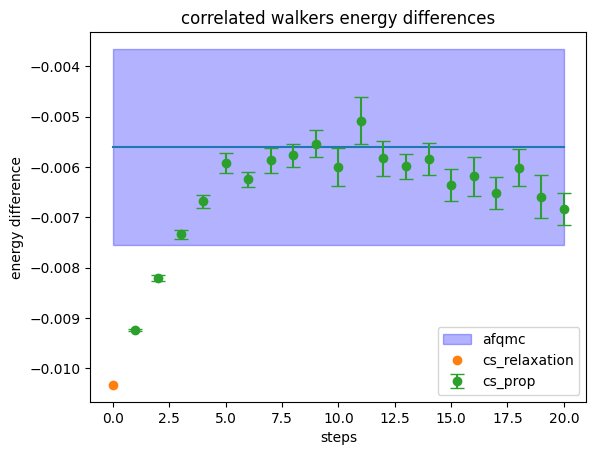

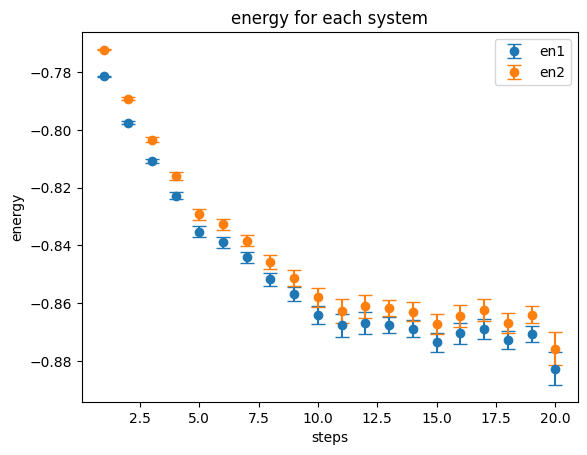

In [16]:
# set weight=0 is weight>5

rlx_data = '''
# relaxation from mean-field object using 100 walkers
# rlx_step       system1_en      system2_en      en_diff
    0            -0.762049       -0.751719       -0.010331
# relaxation time: 3.55
'''

prop_data = '''
# correlated sampling
# tot_walkers: 100, propagation steps: 20, number of independent runs: 100
# step   system1_en      error           system2_en      error           energy_diff     error
# the problem seed is : 514825
  1      -0.781482       0.000238        -0.772242       0.000261        -0.009240       0.000026
  2      -0.797480       0.000498        -0.789272       0.000542        -0.008208       0.000052
  3      -0.810743       0.000802        -0.803402       0.000877        -0.007341       0.000089
  4      -0.822741       0.001284        -0.816058       0.001395        -0.006682       0.000128
  5      -0.835218       0.001874        -0.829295       0.002024        -0.005923       0.000195
  6      -0.838928       0.001847        -0.832683       0.001949        -0.006245       0.000146
  7      -0.844175       0.001881        -0.838307       0.002057        -0.005869       0.000250
  8      -0.851645       0.002271        -0.845874       0.002395        -0.005771       0.000233
  9      -0.856835       0.002530        -0.851294       0.002749        -0.005541       0.000272
  10     -0.863985       0.003095        -0.857985       0.003295        -0.005999       0.000380
  11     -0.867707       0.003822        -0.862627       0.004175        -0.005081       0.000463
  12     -0.866846       0.003773        -0.861015       0.004025        -0.005831       0.000344
  13     -0.867674       0.002753        -0.861682       0.002906        -0.005992       0.000253
  14     -0.868775       0.003067        -0.862933       0.003266        -0.005842       0.000312
  15     -0.873533       0.003272        -0.867172       0.003326        -0.006361       0.000317
  16     -0.870470       0.003616        -0.864287       0.003816        -0.006183       0.000388
  17     -0.868892       0.003579        -0.862373       0.003775        -0.006519       0.000327
  18     -0.872770       0.003221        -0.866754       0.003445        -0.006016       0.000373
  19     -0.870527       0.002763        -0.863934       0.002978        -0.006593       0.000430
  20     -0.882606       0.005683        -0.875768       0.005716        -0.006838       0.000321
'''

rlx_en_diff = []
lines = rlx_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 3:
            rlx_en_diff.append(columns[3])

rlx_en_diff = np.array(rlx_en_diff,dtype='float32')
print(f'{rlx_en_diff}')

prop_en_diff = []
prop_en_diff_err = []
lines = prop_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 5:
            prop_en_diff.append(columns[5])
        if len(columns) > 6:
            prop_en_diff_err.append(columns[6])

prop_en_diff = np.array(prop_en_diff,dtype='float32')
print(f'post relaxation propagation energy difference: {prop_en_diff}')
prop_en_diff_err = np.array(prop_en_diff_err,dtype='float32')
print(f'energy difference error: {prop_en_diff_err}')

rlx_steps = np.arange(len(rlx_en_diff))
prop_steps = np.arange(len(rlx_en_diff),len(rlx_en_diff)+len(prop_en_diff))

afqmc_en_diff = -0.005606581337333716
afqmc_en_diff_err = 0.0019502384765517759
print(f'uncorrelated afqmc energy error: {afqmc_en_diff_err}')
x_steps = np.linspace(0,max(prop_steps),100)
afqmc_en = np.array([afqmc_en_diff]*len(x_steps))
afqmc_lw = afqmc_en-afqmc_en_diff_err
afqmc_up = afqmc_en+afqmc_en_diff_err
plt.plot(x_steps,afqmc_en)
plt.fill_between(x_steps, afqmc_lw, afqmc_up, color='blue', alpha=0.3, label='afqmc')
plt.plot(rlx_steps,rlx_en_diff,'o',label='cs_relaxation')
plt.errorbar(prop_steps,prop_en_diff,yerr=prop_en_diff_err, fmt='o', capsize=5,label='cs_prop')
plt.xlabel('steps')
plt.ylabel('energy difference')
plt.title('correlated walkers energy differences')
plt.legend()
plt.show()

en1 = []
err1 = []
en2 = []
err2 = []

lines = prop_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 1:
            en1.append(columns[1])
        if len(columns) > 2:
            err1.append(columns[2])
        if len(columns) > 3:
            en2.append(columns[3])
        if len(columns) > 4:
            err2.append(columns[4])

en1 = np.array(en1,dtype='float32')
err1 = np.array(err1,dtype='float32')
en2 = np.array(en2,dtype='float32')
err2 = np.array(err2,dtype='float32')

rlx_en1 = []
rlx_en2 = []
lines = rlx_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 1:
            rlx_en1.append(columns[1])
        if len(columns) > 2:
            rlx_en2.append(columns[2])
            

rlx_en_diff = np.array(rlx_en_diff,dtype='float32')

# plt.plot(rlx_steps,rlx_en1,'o',label='cs_relaxation')
# plt.plot(rlx_steps,rlx_en2,'o',label='cs_relaxation')
plt.errorbar(prop_steps,en1,yerr=err1, fmt='o', capsize=5,label='en1')
plt.errorbar(prop_steps,en2,yerr=err2, fmt='o', capsize=5,label='en2')
plt.xlabel('steps')
plt.ylabel('energy')
plt.title('energy for each system')
plt.legend()
plt.show()

[-0.010331]
post relaxation propagation energy difference: [-0.009273 -0.008236 -0.007318 -0.006506 -0.005777 -0.005814 -0.005913
 -0.005663 -0.006005 -0.006218 -0.006399 -0.006051 -0.00649  -0.006417
 -0.006553 -0.0059   -0.006371 -0.006484 -0.006182 -0.006483]
energy difference error: [2.30e-05 4.90e-05 1.88e-04 1.60e-04 2.39e-04 1.76e-04 1.72e-04 2.54e-04
 2.57e-04 2.59e-04 2.83e-04 2.82e-04 2.88e-04 1.69e-04 3.33e-04 4.63e-04
 2.84e-04 3.16e-04 3.53e-04 2.00e-04]
uncorrelated afqmc energy error: 0.0019502384765517759


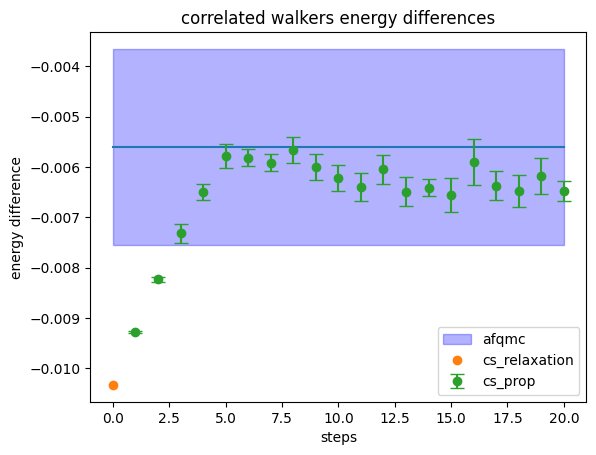

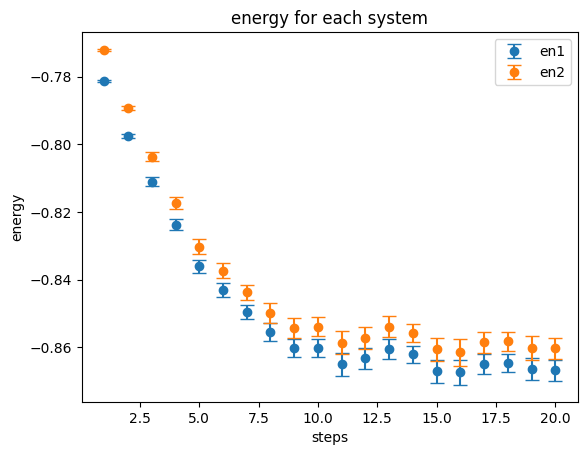

In [24]:
# set weight=0 is weight>5

rlx_data = '''
# relaxation from mean-field object using 100 walkers
# rlx_step       system1_en      system2_en      en_diff
    0            -0.762049       -0.751719       -0.010331
# relaxation time: 3.55
'''

prop_data = '''
# multiple independent post relaxation propagation with step size 0.005s
# correlated sampling
# tot_walkers: 100, propagation steps: 20, number of independent runs: 100
# step   system1_en      error           system2_en      error           energy_diff     error
  1      -0.781342       0.000232        -0.772069       0.000252        -0.009273       0.000023
  2      -0.797541       0.000557        -0.789305       0.000602        -0.008236       0.000049
  3      -0.810987       0.001199        -0.803669       0.001372        -0.007318       0.000188
  4      -0.823805       0.001616        -0.817298       0.001750        -0.006506       0.000160
  5      -0.835993       0.001963        -0.830216       0.002170        -0.005777       0.000239
  6      -0.843117       0.002080        -0.837303       0.002221        -0.005814       0.000176
  7      -0.849607       0.002128        -0.843694       0.002233        -0.005913       0.000172
  8      -0.855446       0.002764        -0.849783       0.002962        -0.005663       0.000254
  9      -0.860172       0.002768        -0.854167       0.002917        -0.006005       0.000257
  10     -0.860092       0.002653        -0.853873       0.002807        -0.006218       0.000259
  11     -0.864948       0.003349        -0.858550       0.003344        -0.006399       0.000283
  12     -0.863220       0.003213        -0.857168       0.003309        -0.006051       0.000282
  13     -0.860348       0.002949        -0.853858       0.003066        -0.006490       0.000288
  14     -0.862055       0.002553        -0.855639       0.002632        -0.006417       0.000169
  15     -0.867081       0.003452        -0.860528       0.003374        -0.006553       0.000333
  16     -0.867355       0.003705        -0.861455       0.004091        -0.005900       0.000463
  17     -0.864885       0.002859        -0.858515       0.002979        -0.006371       0.000284
  18     -0.864638       0.002600        -0.858154       0.002756        -0.006484       0.000316
  19     -0.866350       0.003256        -0.860167       0.003479        -0.006182       0.000353
  20     -0.866728       0.003068        -0.860245       0.003155        -0.006483       0.000200
'''

rlx_en_diff = []
lines = rlx_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 3:
            rlx_en_diff.append(columns[3])

rlx_en_diff = np.array(rlx_en_diff,dtype='float32')
print(f'{rlx_en_diff}')

prop_en_diff = []
prop_en_diff_err = []
lines = prop_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 5:
            prop_en_diff.append(columns[5])
        if len(columns) > 6:
            prop_en_diff_err.append(columns[6])

prop_en_diff = np.array(prop_en_diff,dtype='float32')
print(f'post relaxation propagation energy difference: {prop_en_diff}')
prop_en_diff_err = np.array(prop_en_diff_err,dtype='float32')
print(f'energy difference error: {prop_en_diff_err}')

rlx_steps = np.arange(len(rlx_en_diff))
prop_steps = np.arange(len(rlx_en_diff),len(rlx_en_diff)+len(prop_en_diff))

afqmc_en_diff = -0.005606581337333716
afqmc_en_diff_err = 0.0019502384765517759
print(f'uncorrelated afqmc energy error: {afqmc_en_diff_err}')
x_steps = np.linspace(0,max(prop_steps),100)
afqmc_en = np.array([afqmc_en_diff]*len(x_steps))
afqmc_lw = afqmc_en-afqmc_en_diff_err
afqmc_up = afqmc_en+afqmc_en_diff_err
plt.plot(x_steps,afqmc_en)
plt.fill_between(x_steps, afqmc_lw, afqmc_up, color='blue', alpha=0.3, label='afqmc')
plt.plot(rlx_steps,rlx_en_diff,'o',label='cs_relaxation')
plt.errorbar(prop_steps,prop_en_diff,yerr=prop_en_diff_err, fmt='o', capsize=5,label='cs_prop')
plt.xlabel('steps')
plt.ylabel('energy difference')
plt.title('correlated walkers energy differences')
plt.legend()
plt.show()

en1 = []
err1 = []
en2 = []
err2 = []

lines = prop_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 1:
            en1.append(columns[1])
        if len(columns) > 2:
            err1.append(columns[2])
        if len(columns) > 3:
            en2.append(columns[3])
        if len(columns) > 4:
            err2.append(columns[4])

en1 = np.array(en1,dtype='float32')
err1 = np.array(err1,dtype='float32')
en2 = np.array(en2,dtype='float32')
err2 = np.array(err2,dtype='float32')

rlx_en1 = []
rlx_en2 = []
lines = rlx_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 1:
            rlx_en1.append(columns[1])
        if len(columns) > 2:
            rlx_en2.append(columns[2])
            

rlx_en_diff = np.array(rlx_en_diff,dtype='float32')

# plt.plot(rlx_steps,rlx_en1,'o',label='cs_relaxation')
# plt.plot(rlx_steps,rlx_en2,'o',label='cs_relaxation')
plt.errorbar(prop_steps,en1,yerr=err1, fmt='o', capsize=5,label='en1')
plt.errorbar(prop_steps,en2,yerr=err2, fmt='o', capsize=5,label='en2')
plt.xlabel('steps')
plt.ylabel('energy')
plt.title('energy for each system')
plt.legend()
plt.show()

[-0.010331]
post relaxation propagation energy difference: [-0.009237 -0.008236 -0.007413 -0.006146 -0.005932 -0.005548 -0.005651
 -0.005202 -0.005324 -0.005731 -0.005536 -0.006017 -0.006474 -0.004956
 -0.006564 -0.006521 -0.006413 -0.005924 -0.006774 -0.006613]
energy difference error: [2.20e-05 4.90e-05 8.10e-05 3.80e-04 2.32e-04 2.51e-04 1.97e-04 3.27e-04
 3.29e-04 3.19e-04 2.82e-04 2.82e-04 4.47e-04 1.51e-03 2.69e-04 2.44e-04
 3.50e-04 3.45e-04 3.01e-04 3.22e-04]
uncorrelated afqmc energy error: 0.0019502384765517759


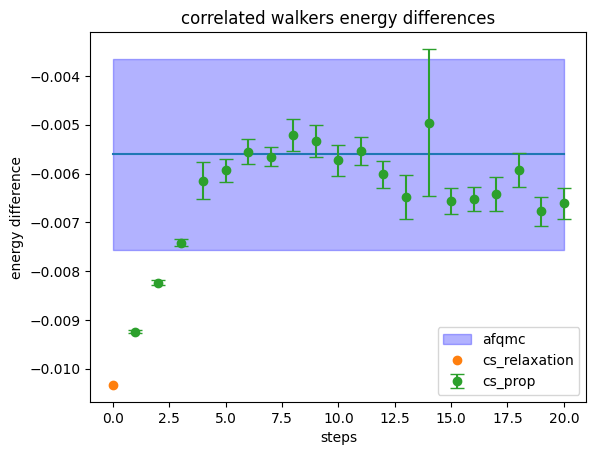

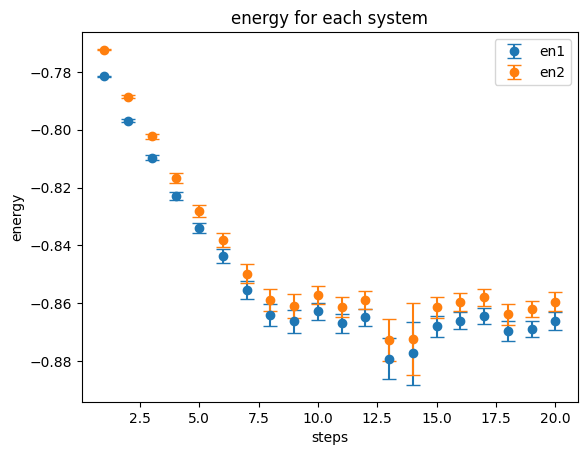

In [19]:
# set weight=0 if weight>100

rlx_data = '''
# relaxation from mean-field object using 100 walkers
# rlx_step       system1_en      system2_en      en_diff
    0            -0.762049       -0.751719       -0.010331
# relaxation time: 3.55
'''

prop_data = '''
# multiple independent post relaxation propagation with step size 0.005s
# correlated sampling
# tot_walkers: 100, propagation steps: 20, number of independent runs: 100
# step   system1_en      error           system2_en      error           energy_diff     error
# the problem seed is : 595936
  1      -0.781580       0.000244        -0.772344       0.000264        -0.009237       0.000022
  2      -0.796874       0.000469        -0.788639       0.000512        -0.008236       0.000049
  3      -0.809639       0.000760        -0.802226       0.000829        -0.007413       0.000081
  4      -0.822873       0.001465        -0.816727       0.001764        -0.006146       0.000380
  5      -0.834055       0.001827        -0.828123       0.001994        -0.005932       0.000232
  6      -0.843711       0.002305        -0.838163       0.002486        -0.005548       0.000251
  7      -0.855428       0.003279        -0.849777       0.003400        -0.005651       0.000197
  8      -0.864049       0.003671        -0.858847       0.003891        -0.005202       0.000327
  9      -0.866304       0.004018        -0.860980       0.004277        -0.005324       0.000329
  10     -0.862812       0.002975        -0.857081       0.003195        -0.005731       0.000319
  11     -0.866932       0.003295        -0.861396       0.003495        -0.005536       0.000282
  12     -0.864824       0.002936        -0.858806       0.003149        -0.006017       0.000282
  13     -0.879164       0.007159        -0.872690       0.007340        -0.006474       0.000447
  14     -0.877312       0.010941        -0.872355       0.012406        -0.004956       0.001510
  15     -0.868024       0.003541        -0.861460       0.003667        -0.006564       0.000269
  16     -0.866002       0.002976        -0.859481       0.003076        -0.006521       0.000244
  17     -0.864426       0.002764        -0.858013       0.002888        -0.006413       0.000350
  18     -0.869705       0.003385        -0.863781       0.003612        -0.005924       0.000345
  19     -0.868819       0.002714        -0.862045       0.002729        -0.006774       0.000301
  20     -0.866188       0.003158        -0.859575       0.003290        -0.006613       0.000322
'''

rlx_en_diff = []
lines = rlx_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 3:
            rlx_en_diff.append(columns[3])

rlx_en_diff = np.array(rlx_en_diff,dtype='float32')
print(f'{rlx_en_diff}')

prop_en_diff = []
prop_en_diff_err = []
lines = prop_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 5:
            prop_en_diff.append(columns[5])
        if len(columns) > 6:
            prop_en_diff_err.append(columns[6])

prop_en_diff = np.array(prop_en_diff,dtype='float32')
print(f'post relaxation propagation energy difference: {prop_en_diff}')
prop_en_diff_err = np.array(prop_en_diff_err,dtype='float32')
print(f'energy difference error: {prop_en_diff_err}')

rlx_steps = np.arange(len(rlx_en_diff))
prop_steps = np.arange(len(rlx_en_diff),len(rlx_en_diff)+len(prop_en_diff))

afqmc_en_diff = -0.005606581337333716
afqmc_en_diff_err = 0.0019502384765517759
print(f'uncorrelated afqmc energy error: {afqmc_en_diff_err}')
x_steps = np.linspace(0,max(prop_steps),100)
afqmc_en = np.array([afqmc_en_diff]*len(x_steps))
afqmc_lw = afqmc_en-afqmc_en_diff_err
afqmc_up = afqmc_en+afqmc_en_diff_err
plt.plot(x_steps,afqmc_en)
plt.fill_between(x_steps, afqmc_lw, afqmc_up, color='blue', alpha=0.3, label='afqmc')
plt.plot(rlx_steps,rlx_en_diff,'o',label='cs_relaxation')
plt.errorbar(prop_steps,prop_en_diff,yerr=prop_en_diff_err, fmt='o', capsize=5,label='cs_prop')
plt.xlabel('steps')
plt.ylabel('energy difference')
plt.title('correlated walkers energy differences')
plt.legend()
plt.show()

en1 = []
err1 = []
en2 = []
err2 = []

lines = prop_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 1:
            en1.append(columns[1])
        if len(columns) > 2:
            err1.append(columns[2])
        if len(columns) > 3:
            en2.append(columns[3])
        if len(columns) > 4:
            err2.append(columns[4])

en1 = np.array(en1,dtype='float32')
err1 = np.array(err1,dtype='float32')
en2 = np.array(en2,dtype='float32')
err2 = np.array(err2,dtype='float32')

rlx_en1 = []
rlx_en2 = []
lines = rlx_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 1:
            rlx_en1.append(columns[1])
        if len(columns) > 2:
            rlx_en2.append(columns[2])
            

rlx_en_diff = np.array(rlx_en_diff,dtype='float32')

# plt.plot(rlx_steps,rlx_en1,'o',label='cs_relaxation')
# plt.plot(rlx_steps,rlx_en2,'o',label='cs_relaxation')
plt.errorbar(prop_steps,en1,yerr=err1, fmt='o', capsize=5,label='en1')
plt.errorbar(prop_steps,en2,yerr=err2, fmt='o', capsize=5,label='en2')
plt.xlabel('steps')
plt.ylabel('energy')
plt.title('energy for each system')
plt.legend()
plt.show()

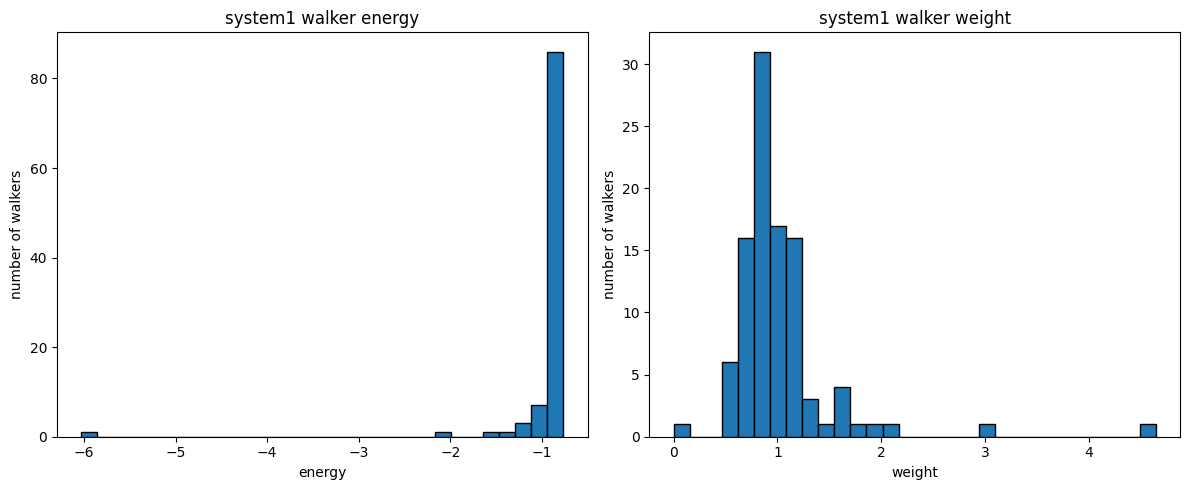

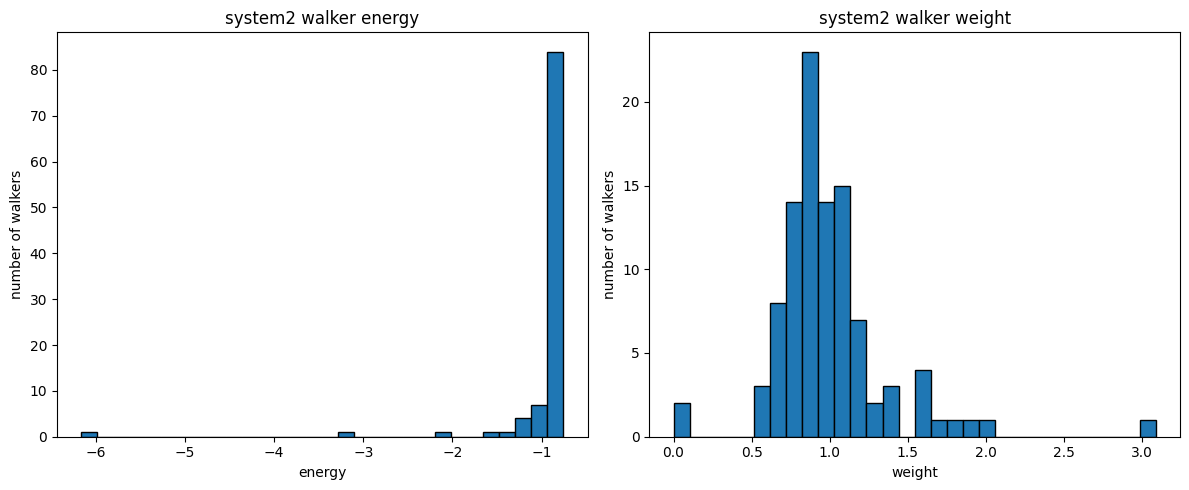

In [6]:
### investigate walkers at step 7 ###

walker_data = '''
# walkers analyze of the last step
# the energy system1 is -1.109353
# the energy system2 is -0.866024
# walker 	 system1_en 	 system1_wt 	 	 overlap1 	 imp1 	 system2_en 	 system2_wt 	 	 overlap2 	 imp2
  1 	 	  -0.783605 	 1.080618 	  -0.040090+-0.641161j 	 0.000000  -0.773692 	 1.106534 	   -0.142674+-0.625940j 	 0.000000
  2 	 	  -0.767416 	 0.796177 	  -0.824076+-0.283301j 	 0.000000  -0.758314 	 0.781798 	   -0.814732+-0.300250j 	 0.000000
  3 	 	  -0.905752 	 0.931926 	  0.307507+-0.401013j 	 0.000000  -0.891348 	 0.912032 	   0.335529+-0.392702j 	 0.000000
  4 	 	  -0.828372 	 0.875911 	  0.655571+0.266946j 	 0.000000  -0.823834 	 0.875874 	   0.642354+0.279692j 	 0.000000
  5 	 	  -0.793609 	 1.051778 	  0.147981+-0.623778j 	 0.000000  -0.782915 	 1.062871 	   0.220308+-0.603031j 	 0.000000
  6 	 	  -0.817068 	 1.550122 	  -0.679594+0.233054j 	 0.000000  -0.806574 	 1.578123 	   -0.703663+0.177782j 	 0.000000
  7 	 	  -0.769749 	 0.844769 	  0.461211+0.701591j 	 0.000000  -0.757844 	 0.827739 	   0.507166+0.683090j 	 0.000000
  8 	 	  -0.820394 	 1.228719 	  0.454304+0.385622j 	 0.000000  -0.818115 	 1.232841 	   0.449095+0.371523j 	 0.000000
  9 	 	  -0.836576 	 0.734877 	  -0.243554+0.550072j 	 0.000000  -0.837567 	 0.731256 	   -0.334492+0.481471j 	 0.000000
  10 	 	  -0.771593 	 0.942060 	  0.569540+-0.661055j 	 0.000000  -0.760250 	 0.929318 	   0.590738+-0.645369j 	 0.000000
  11 	 	  -0.764823 	 0.703982 	  -0.407726+-0.793697j 	 0.000000  -0.755773 	 0.685645 	   -0.300191+-0.835562j 	 0.000000
  12 	 	  -0.784820 	 0.800633 	  0.676402+-0.099903j 	 0.000000  -0.771952 	 0.831816 	   0.688274+-0.095260j 	 0.000000
  13 	 	  -1.037350 	 1.112468 	  -0.165851+-0.395560j 	 0.000000  -1.040963 	 1.102767 	   -0.176816+-0.387531j 	 0.000000
  14 	 	  -0.767644 	 1.869217 	  0.261281+0.712890j 	 0.000000  -0.754537 	 1.870192 	   0.280350+0.707025j 	 0.000000
  15 	 	  -2.168577 	 1.591416 	  0.059808+0.098684j 	 0.000000  -2.126543 	 1.568131 	   0.070966+0.098826j 	 0.000000
  16 	 	  -0.775776 	 0.532619 	  -0.814505+-0.099580j 	 0.000000  -0.763453 	 0.517453 	   -0.828334+-0.016269j 	 0.000000
  17 	 	  -0.831931 	 0.636593 	  -0.651607+0.245047j 	 0.000000  -0.818910 	 0.627040 	   -0.649111+0.282096j 	 0.000000
  18 	 	  -0.808216 	 0.690915 	  0.648506+0.129362j 	 0.000000  -0.800802 	 0.683705 	   0.653831+0.068810j 	 0.000000
  19 	 	  -0.934209 	 1.076024 	  -0.249606+0.460079j 	 0.000000  -0.936551 	 1.111876 	   -0.203688+0.472680j 	 0.000000
  20 	 	  -0.859667 	 1.175117 	  -0.589899+0.194169j 	 0.000000  -0.842062 	 1.185064 	   -0.634549+0.096867j 	 0.000000
  21 	 	  -0.911897 	 0.890608 	  -0.069467+0.472345j 	 0.000000  -0.911102 	 0.889080 	   -0.059147+0.471415j 	 0.000000
  22 	 	  -1.071653 	 2.029050 	  -0.206187+0.283480j 	 0.000000  -1.057016 	 2.046808 	   -0.200605+0.298578j 	 0.000000
  23 	 	  -0.769540 	 0.921397 	  0.286131+0.796762j 	 0.000000  -0.759405 	 0.919756 	   0.315089+0.785338j 	 0.000000
  24 	 	  -0.871920 	 0.838998 	  0.295863+0.532347j 	 0.000000  -0.866218 	 0.849298 	   0.268562+0.549899j 	 0.000000
  25 	 	  -0.798705 	 0.780306 	  -0.584296+0.211743j 	 0.000000  -0.790865 	 0.773073 	   -0.579805+0.214794j 	 0.000000
  26 	 	  -0.850033 	 1.111458 	  -0.527999+-0.169698j 	 0.000000  -0.846715 	 1.122959 	   -0.524455+-0.159100j 	 0.000000
  27 	 	  -0.876189 	 0.891012 	  -0.038422+-0.497191j 	 0.000000  -0.875491 	 0.882346 	   -0.107754+-0.477129j 	 0.000000
  28 	 	  -0.767511 	 0.831551 	  -0.398666+0.619797j 	 0.000000  -0.757116 	 0.829426 	   -0.428663+0.598992j 	 0.000000
  29 	 	  -0.897597 	 0.990363 	  0.089674+0.534400j 	 0.000000  -0.900880 	 0.986067 	   0.052882+0.526583j 	 0.000000
  30 	 	  -0.789812 	 0.781734 	  0.104038+0.817064j 	 0.000000  -0.776443 	 0.770985 	   0.131068+0.822209j 	 0.000000
  31 	 	  -0.774740 	 0.886492 	  0.107501+0.769195j 	 0.000000  -0.764531 	 0.883741 	   0.132143+0.764643j 	 0.000000
  32 	 	  -0.785099 	 0.811888 	  -0.302703+-0.654845j 	 0.000000  -0.774382 	 0.806016 	   -0.282598+-0.665019j 	 0.000000
  33 	 	  -0.775611 	 1.002851 	  0.864850+-0.055785j 	 0.000000  -0.762869 	 1.026894 	   0.875116+-0.072631j 	 0.000000
  34 	 	  -0.824151 	 1.214686 	  -0.346910+-0.655983j 	 0.000000  -0.820288 	 1.229406 	   -0.357819+-0.639534j 	 0.000000
  35 	 	  -0.772117 	 0.743466 	  -0.501207+0.628299j 	 0.000000  -0.763123 	 0.734117 	   -0.542342+0.590263j 	 0.000000
  36 	 	  -1.534016 	 1.111635 	  0.005340+0.192814j 	 0.000000  -1.546823 	 1.127406 	   0.021880+0.192868j 	 0.000000
  37 	 	  -0.773172 	 1.593791 	  0.214149+-0.723688j 	 0.000000  -0.761679 	 1.558862 	   0.278694+-0.705699j 	 0.000000
  38 	 	  -0.797656 	 0.937649 	  -0.446933+-0.716027j 	 0.000000  -0.783384 	 0.937928 	   -0.475810+-0.714068j 	 0.000000
  39 	 	  -0.765936 	 0.855663 	  0.719550+0.078694j 	 0.000000  -0.755767 	 0.852386 	   0.717982+0.092780j 	 0.000000
  40 	 	  -0.840409 	 0.878486 	  -0.686856+-0.034101j 	 0.000000  -0.830981 	 0.881409 	   -0.687361+-0.056663j 	 0.000000
  41 	 	  -0.765263 	 0.985459 	  -0.352360+0.786413j 	 0.000000  -0.754670 	 0.976467 	   -0.341128+0.794740j 	 0.000000
  42 	 	  -0.765454 	 1.351832 	  -0.597702+0.652218j 	 0.000000  -0.754883 	 1.362717 	   -0.601941+0.651056j 	 0.000000
  43 	 	  -0.971750 	 1.254388 	  0.069553+-0.468338j 	 0.000000  -0.971799 	 1.276561 	   0.008820+-0.468259j 	 0.000000
  44 	 	  -0.777204 	 0.962244 	  0.659725+-0.467971j 	 0.000000  -0.766411 	 0.959919 	   0.694949+-0.416891j 	 0.000000
  45 	 	  -0.775943 	 0.914655 	  0.646350+0.521406j 	 0.000000  -0.765166 	 0.924415 	   0.598669+0.584626j 	 0.000000
  46 	 	  -0.770809 	 0.000000 	  -0.477280+0.227965j 	 0.000000  -3.113547 	 0.000000 	   0.020840+0.057904j 	 0.000000
  47 	 	  -0.777474 	 0.954835 	  -0.014968+0.695497j 	 0.000000  -0.767481 	 0.949231 	   -0.026033+0.693140j 	 0.000000
  48 	 	  -0.926072 	 1.214299 	  -0.102141+0.473106j 	 0.000000  -0.907630 	 1.197547 	   -0.089980+0.493545j 	 0.000000
  49 	 	  -0.779770 	 1.395996 	  0.486283+-0.643799j 	 0.000000  -0.769933 	 1.393468 	   0.477714+-0.649443j 	 0.000000
  50 	 	  -1.201732 	 1.010117 	  -0.157850+0.222890j 	 0.000000  -1.205820 	 1.005990 	   -0.158520+0.224530j 	 0.000000
  51 	 	  -0.887275 	 0.919107 	  -0.028272+-0.555813j 	 0.000000  -0.894680 	 0.932211 	   -0.037657+-0.535257j 	 0.000000
  52 	 	  -0.774049 	 1.122061 	  -0.500234+0.636772j 	 0.000000  -0.763609 	 1.132281 	   -0.555245+0.590202j 	 0.000000
  53 	 	  -1.012828 	 1.105820 	  0.153165+-0.340943j 	 0.000000  -1.036374 	 1.116923 	   0.206505+-0.290994j 	 0.000000
  54 	 	  -0.770313 	 1.086206 	  0.169197+-0.639176j 	 0.000000  -0.761422 	 1.097008 	   0.128478+-0.645370j 	 0.000000
  55 	 	  -0.822191 	 1.038571 	  0.038948+0.661261j 	 0.000000  -0.807695 	 1.039312 	   0.020814+0.673360j 	 0.000000
  56 	 	  -0.785703 	 1.102485 	  0.603057+0.425247j 	 0.000000  -0.776327 	 1.087960 	   0.652767+0.340728j 	 0.000000
  57 	 	  -0.781059 	 0.912158 	  0.094983+0.657100j 	 0.000000  -0.773233 	 0.900777 	   0.242150+0.602177j 	 0.000000
  58 	 	  -0.783181 	 0.887457 	  -0.381064+-0.655321j 	 0.000000  -0.770757 	 0.875933 	   -0.495807+-0.583892j 	 0.000000
  59 	 	  -0.765335 	 0.845144 	  -0.633967+0.620471j 	 0.000000  -0.756030 	 0.851717 	   -0.682137+0.568022j 	 0.000000
  60 	 	  -0.788080 	 0.994045 	  -0.309239+-0.646836j 	 0.000000  -0.780112 	 0.981703 	   -0.257204+-0.664683j 	 0.000000
  61 	 	  -0.784576 	 0.577109 	  0.639991+-0.284028j 	 0.000000  -0.776251 	 0.901394 	   0.622443+-0.307380j 	 0.000000
  62 	 	  -1.356178 	 0.626083 	  0.238546+0.002930j 	 0.000000  -1.365939 	 0.982560 	   0.237882+-0.035090j 	 0.000000
  63 	 	  -6.033266 	 4.642629 	  -0.019466+0.030840j 	 0.000000  -6.166353 	 0.000000 	   -0.024826+0.027422j 	 0.000000
  64 	 	  -1.175267 	 0.862089 	  0.178897+0.180060j 	 0.000000  -1.151478 	 1.381969 	   0.148919+0.219465j 	 0.000000
  65 	 	  -0.796140 	 1.003689 	  0.178318+-0.543731j 	 0.000000  -0.784878 	 1.606532 	   0.241594+-0.525017j 	 0.000000
  66 	 	  -0.853432 	 0.703238 	  -0.151033+-0.586475j 	 0.000000  -0.841333 	 1.116840 	   -0.196934+-0.582713j 	 0.000000
  67 	 	  -0.782577 	 0.696914 	  -0.329219+0.643623j 	 0.000000  -0.772689 	 1.088083 	   -0.345785+0.631790j 	 0.000000
  68 	 	  -0.787875 	 0.627401 	  -0.565506+-0.351630j 	 0.000000  -0.776180 	 0.983994 	   -0.590558+-0.309956j 	 0.000000
  69 	 	  -0.789849 	 0.532037 	  0.392679+-0.556682j 	 0.000000  -0.779109 	 0.821621 	   0.383248+-0.562192j 	 0.000000
  70 	 	  -0.849879 	 0.586587 	  -0.495071+-0.270010j 	 0.000000  -0.836427 	 0.914875 	   -0.487147+-0.302748j 	 0.000000
  71 	 	  -0.812563 	 0.809461 	  0.181034+-0.438400j 	 0.000000  -0.808061 	 0.793736 	   0.237395+-0.388114j 	 0.000000
  72 	 	  -0.816461 	 0.704177 	  0.350338+0.570826j 	 0.000000  -0.814471 	 0.687737 	   0.355534+0.549639j 	 0.000000
  73 	 	  -0.790745 	 0.659259 	  -0.173695+0.528725j 	 0.000000  -0.777582 	 0.633712 	   -0.068023+0.550361j 	 0.000000
  74 	 	  -0.977324 	 0.788527 	  0.082464+-0.342974j 	 0.000000  -0.986961 	 0.768869 	   0.103842+-0.325571j 	 0.000000
  75 	 	  -0.768975 	 0.721262 	  -0.825256+0.306546j 	 0.000000  -0.758436 	 0.695077 	   -0.832461+0.280395j 	 0.000000
  76 	 	  -0.787245 	 0.723988 	  0.317834+0.651706j 	 0.000000  -0.776516 	 0.702108 	   0.338718+0.644298j 	 0.000000
  77 	 	  -0.836734 	 0.911604 	  0.539080+-0.484939j 	 0.000000  -0.827156 	 0.916751 	   0.627463+-0.371831j 	 0.000000
  78 	 	  -0.782873 	 0.854688 	  -0.665354+0.071496j 	 0.000000  -0.772692 	 0.845718 	   -0.665677+0.070261j 	 0.000000
  79 	 	  -0.783509 	 0.908769 	  -0.525918+0.456768j 	 0.000000  -0.775838 	 0.899769 	   -0.506825+0.461309j 	 0.000000
  80 	 	  -0.833011 	 2.949220 	  0.214204+-0.670916j 	 0.000000  -0.819100 	 3.089638 	   0.311395+-0.647792j 	 0.000000
  81 	 	  -0.786111 	 0.805584 	  0.263424+0.739266j 	 0.000000  -0.776303 	 0.815275 	   0.151703+0.770231j 	 0.000000
  82 	 	  -0.779697 	 0.881194 	  0.752792+-0.010399j 	 0.000000  -0.769393 	 0.897690 	   0.739822+-0.136368j 	 0.000000
  83 	 	  -0.774322 	 0.746379 	  -0.523742+-0.651340j 	 0.000000  -0.762420 	 0.738415 	   -0.396462+-0.741194j 	 0.000000
  84 	 	  -0.930084 	 1.838356 	  0.502743+0.138656j 	 0.000000  -0.933639 	 1.769226 	   0.495852+0.127275j 	 0.000000
  85 	 	  -0.821102 	 1.102439 	  -0.731590+-0.040894j 	 0.000000  -0.813526 	 1.113372 	   -0.721860+-0.122935j 	 0.000000
  86 	 	  -1.049989 	 0.794897 	  0.448102+0.010601j 	 0.000000  -1.059579 	 0.796676 	   0.437942+0.051168j 	 0.000000
  87 	 	  -0.787146 	 0.826023 	  0.362532+-0.503362j 	 0.000000  -0.777675 	 0.815873 	   0.349165+-0.516863j 	 0.000000
  88 	 	  -1.276806 	 0.611995 	  -0.137668+-0.141706j 	 0.000000  -1.276319 	 0.615575 	   -0.125687+-0.156062j 	 0.000000
  89 	 	  -1.114705 	 1.124419 	  0.291247+0.119573j 	 0.000000  -1.143296 	 1.149465 	   0.283071+0.109357j 	 0.000000
  90 	 	  -0.775419 	 1.301253 	  -0.305400+-0.729701j 	 0.000000  -0.764528 	 1.325306 	   -0.380078+-0.699018j 	 0.000000
  91 	 	  -0.770941 	 0.906755 	  0.730210+-0.388138j 	 0.000000  -0.760592 	 0.884725 	   0.776882+-0.290329j 	 0.000000
  92 	 	  -0.787895 	 1.015598 	  0.023360+-0.644012j 	 0.000000  -0.778071 	 1.023369 	   0.101988+-0.635491j 	 0.000000
  93 	 	  -0.768806 	 1.118399 	  -0.442751+0.606956j 	 0.000000  -0.758642 	 1.135881 	   -0.447974+0.604991j 	 0.000000
  94 	 	  -0.932830 	 1.130828 	  -0.448575+0.207129j 	 0.000000  -0.911611 	 1.120785 	   -0.423732+0.289449j 	 0.000000
  95 	 	  -0.772431 	 1.146073 	  0.226925+0.643235j 	 0.000000  -0.762196 	 1.157947 	   0.189449+0.656470j 	 0.000000
  96 	 	  -0.781155 	 0.727651 	  0.579608+-0.360989j 	 0.000000  -0.771095 	 0.718607 	   0.587853+-0.342763j 	 0.000000
  97 	 	  -0.830513 	 0.945768 	  -0.502815+0.310999j 	 0.000000  -0.826238 	 0.956878 	   -0.448154+0.372265j 	 0.000000
  98 	 	  -0.835436 	 0.764355 	  -0.007122+0.658255j 	 0.000000  -0.818430 	 0.753553 	   0.019206+0.677437j 	 0.000000
  99 	 	  -0.792832 	 0.602756 	  -0.414477+-0.711263j 	 0.000000  -0.781483 	 0.598250 	   -0.507766+-0.649895j 	 0.000000
  100 	 	  -0.779600 	 1.645035 	  -0.741097+0.178271j 	 0.000000  -0.767344 	 1.653096 	   -0.741785+0.215948j 	 0.000000

'''

walker_en1 = []
walker_wt1 = []
walker_en2 = []
walker_wt2 = []
lines = walker_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 1:
            walker_en1.append(columns[1])
        if len(columns) > 2:
            walker_wt1.append(columns[2])
        if len(columns) > 3:
            walker_en2.append(columns[5])
        if len(columns) > 4:
            walker_wt2.append(columns[6])

walker_en1 = np.array(walker_en1,dtype='float32')
walker_wt1 = np.array(walker_wt1,dtype='float32')
walker_en2 = np.array(walker_en2,dtype='float32')
walker_wt2 = np.array(walker_wt2,dtype='float32')



# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot data in the first subplot
ax1.hist(walker_en1 , bins=30, edgecolor='black')  
ax1.set_title("system1 walker energy")
ax1.set_xlabel("energy")
ax1.set_ylabel("number of walkers")


# Plot data in the second subplot
ax2.hist(walker_wt1 , bins=30, edgecolor='black')  
ax2.set_title("system1 walker weight")
ax2.set_xlabel("weight")
ax2.set_ylabel("number of walkers")


# Adjust layout and display the plot
plt.tight_layout()
plt.show()



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot data in the first subplot
ax1.hist(walker_en2 , bins=30, edgecolor='black')  
ax1.set_title("system2 walker energy")
ax1.set_xlabel("energy")
ax1.set_ylabel("number of walkers")


# Plot data in the second subplot
ax2.hist(walker_wt2 , bins=30, edgecolor='black')  
ax2.set_title("system2 walker weight")
ax2.set_xlabel("weight")
ax2.set_ylabel("number of walkers")


# Adjust layout and display the plot
plt.tight_layout()
plt.show()

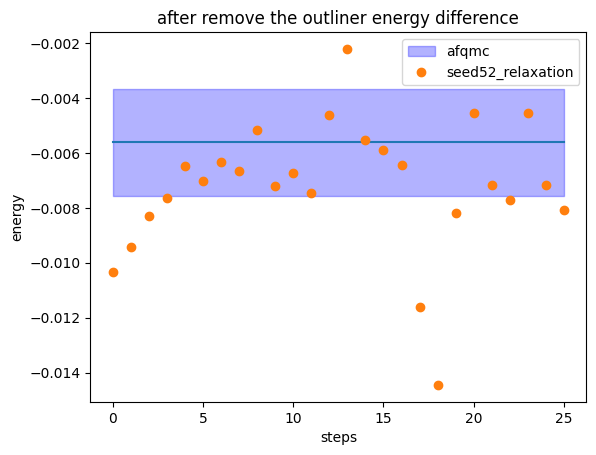

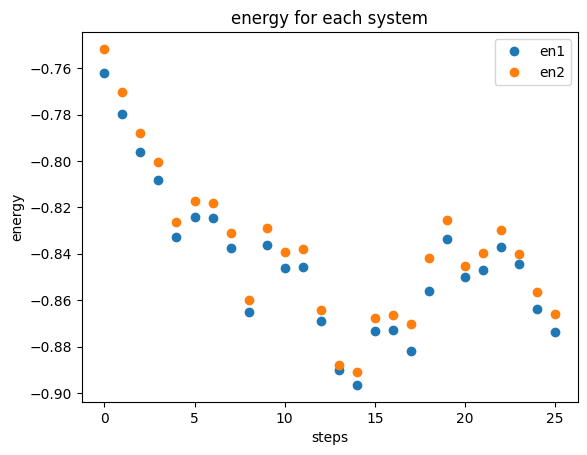

In [8]:
### new step 25 energy after remove the outliner 
rlx_data = '''
# relaxation from mean-field object using 100 walkers
# rlx_step 	 system1_en 	 system2_en 	 en_diff
    0	 	 -0.762049	 -0.751719	 -0.010331
    1 	 	 -0.779823 	 -0.770394 	 -0.009430
    2 	 	 -0.796310 	 -0.788026 	 -0.008284
    3 	 	 -0.808223 	 -0.800574 	 -0.007649
    4 	 	 -0.832627 	 -0.826149 	 -0.006478
    5 	 	 -0.824279 	 -0.817252 	 -0.007028
    6 	 	 -0.824562 	 -0.818226 	 -0.006336
    7 	 	 -0.837577 	 -0.830935 	 -0.006642
    8 	 	 -0.865202 	 -0.860027 	 -0.005175
    9 	 	 -0.836131 	 -0.828939 	 -0.007192
    10 	 	 -0.846074 	 -0.839341 	 -0.006733
    11 	 	 -0.845511 	 -0.838043 	 -0.007468
    12 	 	 -0.869045 	 -0.864415 	 -0.004630
    13 	 	 -0.890114 	 -0.887902 	 -0.002212
    14 	 	 -0.896552 	 -0.891010 	 -0.005542
    15 	 	 -0.873490 	 -0.867604 	 -0.005886
    16 	 	 -0.873003 	 -0.866555 	 -0.006448
    17 	 	 -0.881991 	 -0.870375 	 -0.011617
    18 	 	 -0.856101 	 -0.841651 	 -0.014450
    19 	 	 -0.833788 	 -0.825611 	 -0.008177
    20 	 	 -0.849836 	 -0.845305 	 -0.004530
    21 	 	 -0.847020 	 -0.839857 	 -0.007164
    22 	 	 -0.837287 	 -0.829577 	 -0.007710
    23 	 	 -0.844605 	 -0.840043 	 -0.004562
    24 	 	 -0.863867 	 -0.856692 	 -0.007175
    25 	 	 -0.873898 	 -0.865828 	 -0.008070
# relaxation time: 29.33
'''

step = []
en_diff = []
en1 = []
en2 = []
lines = rlx_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 0:
            step.append(columns[0])
        if len(columns) > 1:
            en1.append(columns[1])
        if len(columns) > 2:
            en2.append(columns[2])
        if len(columns) > 3:
            en_diff.append(columns[3])

step = np.array(step,dtype='float32')
en1 = np.array(en1,dtype='float32')
en2 = np.array(en2,dtype='float32')
en_diff = np.array(en_diff,dtype='float32')


afqmc_en_diff = -0.005606581337333716
afqmc_en_diff_err = 0.0019502384765517759
x_steps = np.linspace(0,max(step),100)
afqmc_en = np.array([afqmc_en_diff]*len(x_steps))
afqmc_lw = afqmc_en-afqmc_en_diff_err
afqmc_up = afqmc_en+afqmc_en_diff_err
plt.plot(x_steps,afqmc_en)
plt.fill_between(x_steps, afqmc_lw, afqmc_up, color='blue', alpha=0.3, label='afqmc')
plt.plot(step,en_diff,'o',label='seed52_relaxation')
#plt.errorbar(prop_steps,prop_en_diff,yerr=prop_en_diff_err, fmt='o', capsize=5,label='ucs_prop')
plt.xlabel('steps')
plt.ylabel('energy')
plt.title('after remove the outliner energy difference')
plt.legend()
plt.show()


plt.plot(step,en1,'o',label='en1')
plt.plot(step,en2,'o',label='en2')
plt.xlabel('steps')
plt.ylabel('energy')
plt.title('energy for each system')
plt.legend()
plt.show()

[-0.010331]
post relaxation propagation energy difference: [-0.00924  -0.008208 -0.007341 -0.006682 -0.005923 -0.006245 -0.005884
 -0.005774 -0.005642 -0.006424 -0.00575  -0.006895 -0.006866 -0.006507
 -0.006622 -0.008505 -0.006409 -0.005836 -0.006594 -0.007392 -0.007648
 -0.007121 -0.007532 -0.007091 -0.006218]
energy difference error: [2.600e-05 5.200e-05 8.900e-05 1.280e-04 1.950e-04 1.460e-04 2.470e-04
 2.330e-04 2.640e-04 5.250e-04 4.390e-04 8.290e-04 4.200e-04 4.880e-04
 3.700e-04 1.693e-03 2.640e-04 3.610e-04 6.210e-04 6.260e-04 6.330e-04
 5.590e-04 4.140e-04 2.780e-04 6.710e-04]
uncorrelated afqmc energy error: 0.0019502384765517759


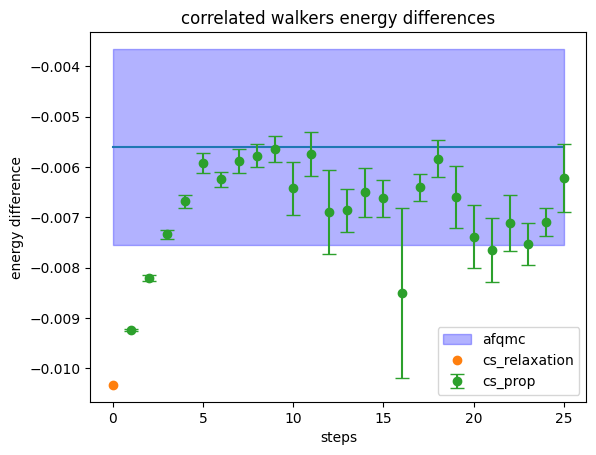

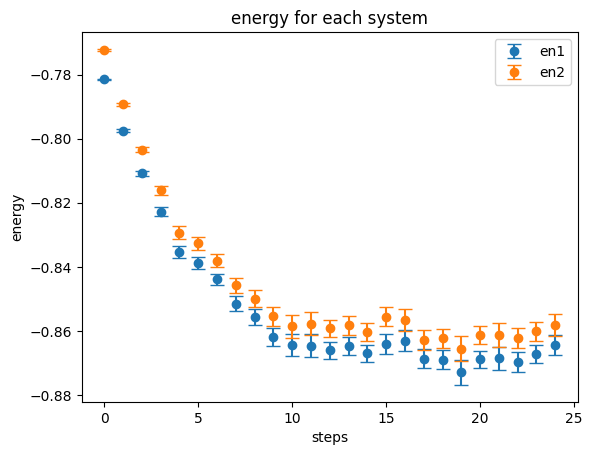

In [10]:
rlx_data = '''
# relaxation from mean-field object using 100 walkers
# rlx_step       system1_en      system2_en      en_diff
    0            -0.762049       -0.751719       -0.010331
# relaxation time: 3.55
'''

prop_data = '''
# multiple independent post relaxation propagation with step size 0.005s
# correlated sampling
# tot_walkers: 100, propagation steps: 25, number of independent runs: 100
# step   system1_en      error           system2_en      error           energy_diff     error
# the problem seed is : 963214
  1      -0.781482       0.000238        -0.772242       0.000261        -0.009240       0.000026
  2      -0.797480       0.000498        -0.789272       0.000542        -0.008208       0.000052
  3      -0.810743       0.000802        -0.803402       0.000877        -0.007341       0.000089
  4      -0.822741       0.001284        -0.816058       0.001395        -0.006682       0.000128
  5      -0.835218       0.001874        -0.829295       0.002024        -0.005923       0.000195
  6      -0.838928       0.001847        -0.832683       0.001949        -0.006245       0.000146
  7      -0.843913       0.001819        -0.838030       0.001991        -0.005884       0.000247
  8      -0.851508       0.002251        -0.845734       0.002374        -0.005774       0.000233
  9      -0.855673       0.002438        -0.850031       0.002647        -0.005642       0.000264
  10     -0.861842       0.002907        -0.855418       0.003001        -0.006424       0.000525
  11     -0.864352       0.003437        -0.858601       0.003693        -0.005750       0.000439
  12     -0.864654       0.003549        -0.857760       0.003612        -0.006895       0.000829
  13     -0.866053       0.002683        -0.859187       0.002749        -0.006866       0.000420
  14     -0.864739       0.002845        -0.858232       0.003003        -0.006507       0.000488
  15     -0.867011       0.002688        -0.860389       0.002847        -0.006622       0.000370
  16     -0.864057       0.003125        -0.855552       0.002864        -0.008505       0.001693
  17     -0.863058       0.003342        -0.856649       0.003534        -0.006409       0.000264
  18     -0.868675       0.002874        -0.862839       0.003102        -0.005836       0.000361
  19     -0.868943       0.002895        -0.862350       0.003065        -0.006594       0.000621
  20     -0.872945       0.003913        -0.865553       0.003983        -0.007392       0.000626
  21     -0.868921       0.002781        -0.861274       0.002861        -0.007648       0.000633
  22     -0.868518       0.003532        -0.861396       0.003742        -0.007121       0.000559
  23     -0.869748       0.003068        -0.862216       0.003133        -0.007532       0.000414
  24     -0.867149       0.002866        -0.860059       0.002940        -0.007091       0.000278
  25     -0.864364       0.003139        -0.858146       0.003541        -0.006218       0.000671
'''

rlx_en_diff = []
lines = rlx_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 3:
            rlx_en_diff.append(columns[3])

rlx_en_diff = np.array(rlx_en_diff,dtype='float32')
print(f'{rlx_en_diff}')

prop_en_diff = []
prop_en_diff_err = []
lines = prop_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 5:
            prop_en_diff.append(columns[5])
        if len(columns) > 6:
            prop_en_diff_err.append(columns[6])

prop_en_diff = np.array(prop_en_diff,dtype='float32')
print(f'post relaxation propagation energy difference: {prop_en_diff}')
prop_en_diff_err = np.array(prop_en_diff_err,dtype='float32')
print(f'energy difference error: {prop_en_diff_err}')

rlx_steps = np.arange(len(rlx_en_diff))
prop_steps = np.arange(len(rlx_en_diff),len(rlx_en_diff)+len(prop_en_diff))

afqmc_en_diff = -0.005606581337333716
afqmc_en_diff_err = 0.0019502384765517759
print(f'uncorrelated afqmc energy error: {afqmc_en_diff_err}')
x_steps = np.linspace(0,max(prop_steps),100)
afqmc_en = np.array([afqmc_en_diff]*len(x_steps))
afqmc_lw = afqmc_en-afqmc_en_diff_err
afqmc_up = afqmc_en+afqmc_en_diff_err
plt.plot(x_steps,afqmc_en)
plt.fill_between(x_steps, afqmc_lw, afqmc_up, color='blue', alpha=0.3, label='afqmc')
plt.plot(rlx_steps,rlx_en_diff,'o',label='cs_relaxation')
plt.errorbar(prop_steps,prop_en_diff,yerr=prop_en_diff_err, fmt='o', capsize=5,label='cs_prop')
plt.xlabel('steps')
plt.ylabel('energy difference')
plt.title('correlated walkers energy differences')
plt.legend()
plt.show()

en1 = []
err1 = []
en2 = []
err2 = []

lines = prop_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 1:
            en1.append(columns[1])
        if len(columns) > 2:
            err1.append(columns[2])
        if len(columns) > 3:
            en2.append(columns[3])
        if len(columns) > 4:
            err2.append(columns[4])

en1 = np.array(en1,dtype='float32')
err1 = np.array(err1,dtype='float32')
en2 = np.array(en2,dtype='float32')
err2 = np.array(err2,dtype='float32')
prop_steps = np.arange(len(en1))

plt.errorbar(prop_steps,en1,yerr=err1, fmt='o', capsize=5,label='en1')
plt.errorbar(prop_steps,en2,yerr=err2, fmt='o', capsize=5,label='en2')
plt.xlabel('steps')
plt.ylabel('energy')
plt.title('energy for each system')
plt.legend()
plt.show()